In [6]:
import os
import datetime
import random
import warnings
import imghdr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import ResNet50, EfficientNetB0

from PIL import Image
import imagehash

import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras import callbacks
import keras
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam

import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

import os
from PIL import Image
import imagehash

import os
from PIL import Image
import imagehash
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

## 1. Introduction and Problem Definition

In this project, I explored the use of deep learning to classify 90 species of animals using a dataset containing 60 images per species. My goal was to develop a robust classification model capable of accurately identifying various animals even when faced with limited data. To achieve this, I experimented with multiple deep learning architectures.specifically, EfficientNet and ResNet where I evaluated their performances This comparative analysis enabled me to assess which one is best for this kind of problem.

A crucial part of the workflow involved conducting exploratory data analysis (EDA) to understand the dataset’s structure, identify imbalances, and assess image quality. Following this, I carried out data cleaning to remove any corrupted or wrong format images and applied preprocessing techniques such as data augmentation and train, validation ,test split to prepare the data for training. I also focused on hyperparameter tuning where i ran different scenarios of variying hyperparameters such as hidden units and drop out rate. this allowed me to identify the best scenario for the problem. To test the reliability of the models, i did 70% / 20% / 10% train,validation ,test splits which was critical for evaluating how well the models could generalize to real-world data.

One practical application of this animal classification model is in wildlife conservation and research. For example, researchers monitoring animal populations in protected areas can use motion-triggered cameras to capture images of wildlife. By feeding these images into the trained model, species can be identified automatically and efficiently. This enables ecologists to track species distributions, detect population changes, and identify potential threats like poaching. The ability to process this information quickly and accurately not only conserves time and resources but also provides continuous, non-intrusive surveillance, which is critical for preserving biodiversity and maintaining healthy ecosystems.

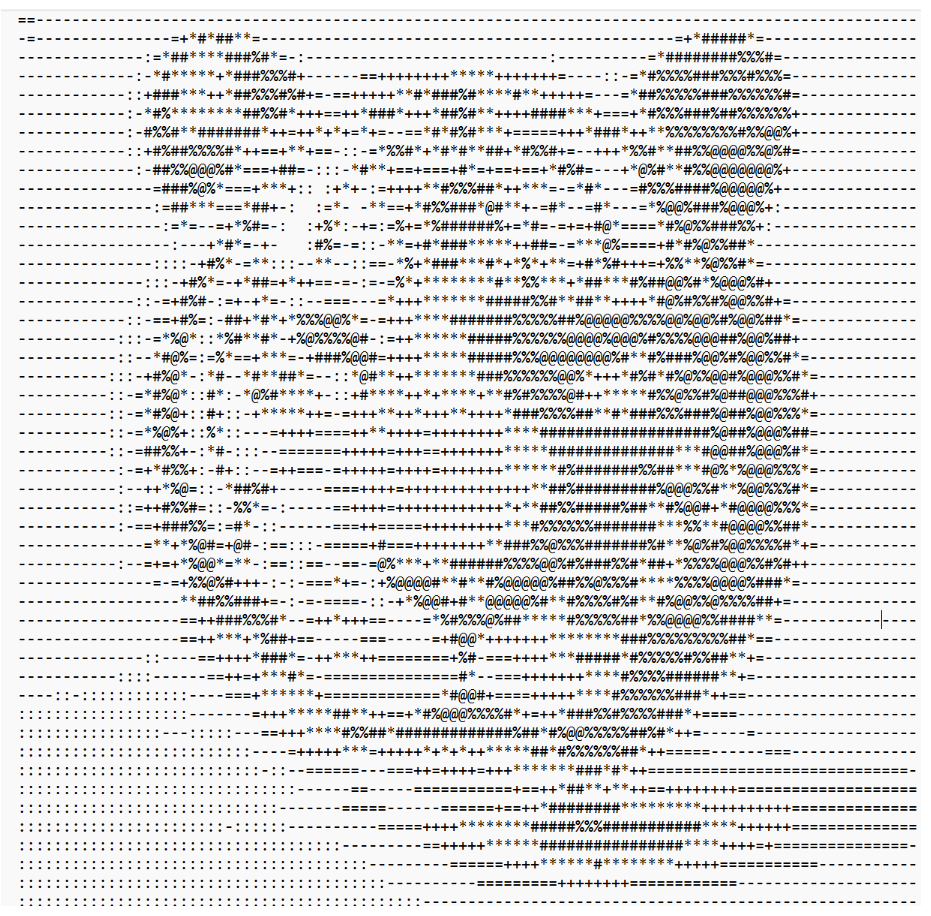

## 2. Data Collection and Loading

- #### Kaggle link

https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals

- #### Datasets Used & References:

This Dataset is created from Google Images: https://images.google.com/ by the username __Sourav Banerjee (2022)__ in Kaggle

- #### Datasets Description:

The dataset comprises 5,400 images representing 90 distinct animal species, with exactly 60 images per species. Each image has been carefully curated to ensure a balanced and diverse collection, making it ideal for multi-class classification tasks. 

- #### Datasets Loading:

In [87]:



# Parameters for image input size and batch size
img_size = (224,224)
batch_size = 32



# Gather all image file paths & class (folder) names
train_dir = r'C:\Master_Computer_Science\ML_Deep_Learning\Final_Project\Train'
data = {"directory": [], "classes": []}

category = os.listdir(train_dir)
for folder in category:
    folderpath = os.path.join(train_dir, folder)
    subdir = os.listdir(folderpath)
    for file in subdir:
        fpath = os.path.join(folderpath, file)
        data["directory"].append(fpath)
        data["classes"].append(folder)
      

df = pd.DataFrame(data)


In [88]:
# Create a list of class folder names (labels) by scanning train_dir for subdirectories
labels = [name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))]
print(labels)

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


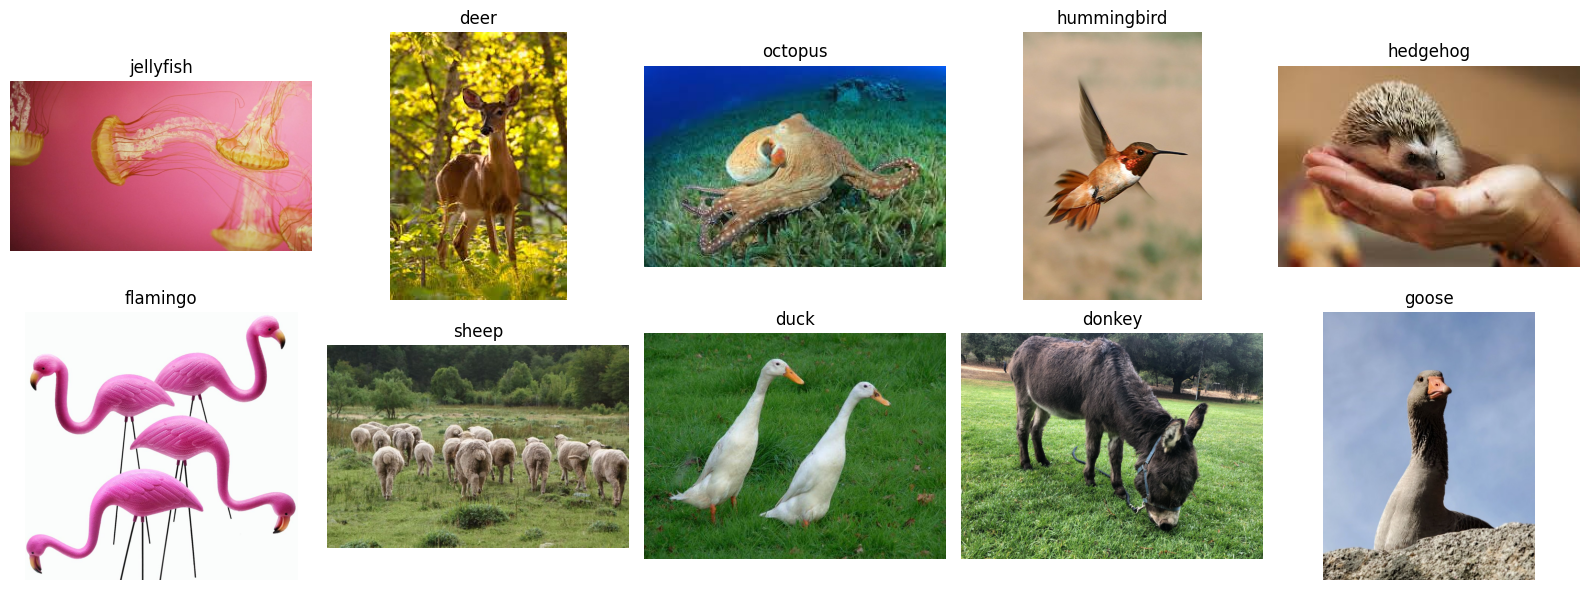

In [9]:
# Randomly sample 10 rows from df
sampled_data = df.sample(n=10, random_state=42)  # remove random_state for fully random

# Create a figure with 2 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 6))

for i, (idx, row) in enumerate(sampled_data.iterrows()):
    # Load the image from disk
    img_path = row['directory']
    img_label = row['classes']
    
    # Open the image
    img = Image.open(img_path)
    
    # Plot in the appropriate subplot
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(img_label)
    ax.axis('off')  # turn off axes ticks/labels for cleaner look

plt.tight_layout()
plt.show()

## 2. Data Cleaning and Quality Control

- #### Check Image Format:

Before training an image classification model, it's important to check the image formats in your dataset to ensure consistency and compatibility. Images may come in different formats such as JPEG, PNG, or BMP, which can affect how they're loaded and processed. Some formats may not support transparency or may vary in compression, color profiles, or file size. Verifying and standardizing image formats helps prevent loading errors, ensures uniform preprocessing, and can improve the reliability of your training pipeline. It's a good practice to convert all images to a common format (like JPEG or PNG) before feeding them into your model.

In [71]:
#Check image format
root_dir = train_dir  # e.g., train_dir = "/path/to/train"

formats = set()  # Store unique image formats

for root, _, files in os.walk(root_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                formats.add(img.format)
        except Exception as e:
            print(f"Error occurring: {e}")

print(f"All available file formats are: \n{formats}")

All available file formats are: 
{'JPEG'}


- #### Check Duplicated Images:

Having duplicated images in an image classification dataset can negatively impact model performance and evaluation. Duplicates can lead to data leakage, especially if identical images appear in both training and validation or test sets, artificially inflating accuracy. They also reduce the effective diversity of the dataset, making the model less robust and more prone to overfitting. Identifying and removing duplicates ensures a cleaner, more representative dataset, which is essential for training a model that generalizes well to unseen data.


Total duplicate images detected: 1442
Total groups of duplicates: 721

Sample duplicate image paths:
 - C:\Master_Computer_Science\ML_Deep_Learning\Final_Project\Train\antelope\0b1a3af197.jpg
 - C:\Master_Computer_Science\ML_Deep_Learning\Final_Project\Train\antelope\0e17715606.jpg


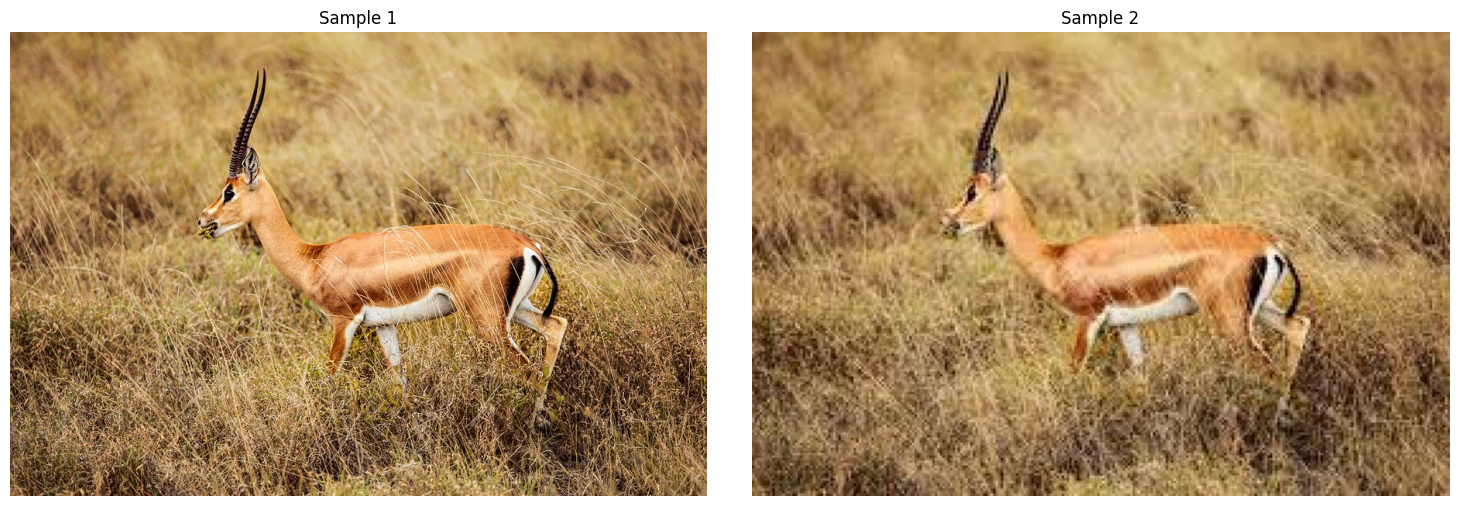

In [73]:


# Path to your training directory
root_dir = train_dir  # replace with your actual path or variable

# Resize settings
resize_size = (128, 128)

# Storage for image hashes
hash_dict = {}

# Walk through files and compute hash after resizing
for root, _, files in os.walk(root_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                img_resized = img.resize(resize_size, Image.Resampling.LANCZOS)
                img_hash = imagehash.phash(img_resized)
                hash_str = str(img_hash)
                hash_dict.setdefault(hash_str, []).append(file_path)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Collect duplicate image groups
duplicate_groups = [paths for paths in hash_dict.values() if len(paths) > 1]

# Count duplicated images (excluding unique ones)
duplicate_image_paths = [path for group in duplicate_groups for path in group]
duplicate_image_count = len(duplicate_image_paths)

# Report
print(f"\nTotal duplicate images detected: {duplicate_image_count}")
print(f"Total groups of duplicates: {len(duplicate_groups)}")

# Show 3 sample images from the first group of duplicates
if duplicate_groups:
    sample_group = duplicate_groups[0][:3]  # Get up to 3 images from the first group

    print("\nSample duplicate image paths:")
    for path in sample_group:
        print(f" - {path}")

    # Display the images
    fig, axs = plt.subplots(1, len(sample_group), figsize=(15, 5))
    for i, img_path in enumerate(sample_group):
        with Image.open(img_path) as img:
            axs[i].imshow(img)
            axs[i].axis('off')
            axs[i].set_title(f"Sample {i+1}")
    plt.tight_layout()
    plt.show()
else:
    print("No duplicates found.")

- #### Check Outlier Images:

Outlier images in image classification are samples that significantly differ from the rest of the dataset, such as being extremely dark, overly bright, blurry, or miscategorized. These anomalies can confuse the model during training, leading to poor generalization and reduced accuracy. Outliers may result from data collection errors, mislabeled files, or inconsistent preprocessing. Identifying and addressing outlier images—either by correcting, removing, or augmenting them—helps improve dataset quality, stabilizes training, and enhances overall model performance.

After reviewing the outlier images in the dataset, I decided not to take any further action to remove or adjust them. While outliers can sometimes impact model performance, in this case they represent a small portion of the data and may contribute to the model's ability to handle real-world variability. Therefore, I chose to retain them to preserve the natural diversity of the dataset.

Scanning approximately 5400 images...
Processed 500/5400 images (4.4s elapsed)
Processed 1000/5400 images (7.9s elapsed)
Processed 1500/5400 images (12.6s elapsed)
Processed 2000/5400 images (16.6s elapsed)
Processed 2500/5400 images (21.0s elapsed)
Processed 3000/5400 images (25.3s elapsed)
Processed 3500/5400 images (29.7s elapsed)
Processed 4000/5400 images (34.3s elapsed)
Processed 4500/5400 images (38.6s elapsed)
Processed 5000/5400 images (43.2s elapsed)
Processed 5400/5400 images (46.8s elapsed)

Total outlier images found: 161
First 10 outliers:
[bat] C:\Master_Computer_Science\ML_Deep_Learning\Final_Project\Train\bat\0315a4b6b7.jpg - Brightness: 0.057
[bat] C:\Master_Computer_Science\ML_Deep_Learning\Final_Project\Train\bat\33d648fe94.jpg - Brightness: 0.939
[bat] C:\Master_Computer_Science\ML_Deep_Learning\Final_Project\Train\bat\3d1dda7723.jpg - Brightness: 0.018
[bat] C:\Master_Computer_Science\ML_Deep_Learning\Final_Project\Train\bat\4c23df5b08.jpg - Brightness: 0.041
[bat

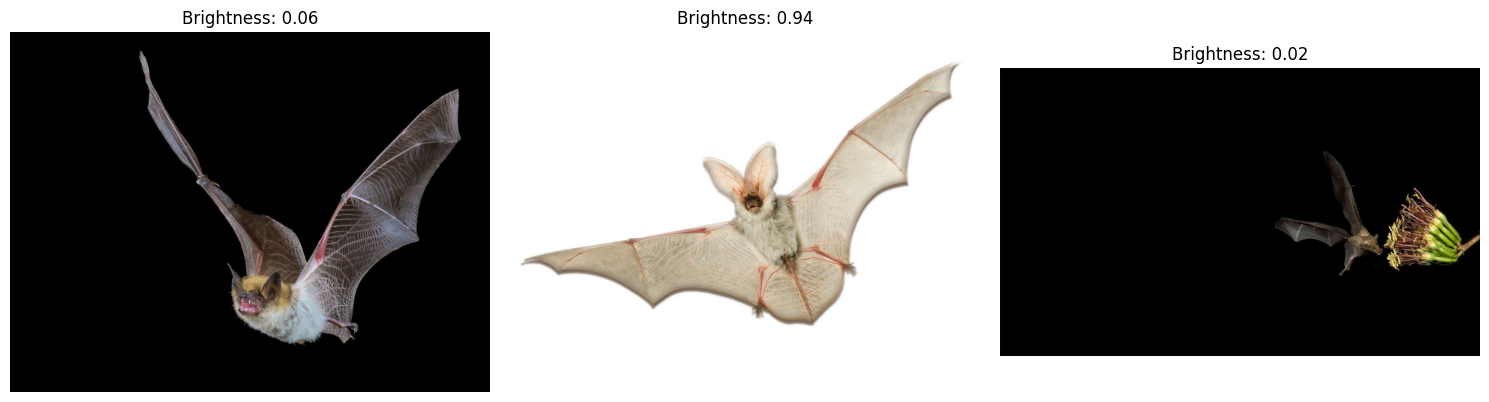

In [77]:
import os
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


brightness_threshold = 0.1
resize_size = (128, 128)
outliers = []

# Your class labels as strings
class_names = list(train_dataset.class_indices.keys())

# Estimate total images (for progress reporting) ===
total_images = sum(
    len(files)
    for cls in class_names
    for _, _, files in os.walk(os.path.join(train_dir, cls))
    if files
)

print(f"Scanning approximately {total_images} images...")

# Outlier Detection Loop with Progress 
start_time = time.time()
processed = 0

for cls in class_names:
    cls_dir = os.path.join(train_dir, cls)
    if not os.path.exists(cls_dir):
        print(f"Directory not found: {cls_dir}")
        continue

    for root, _, files in os.walk(cls_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        img = img.resize(resize_size, Image.Resampling.LANCZOS)
                        img_gray = img.convert('L')
                        img_np = np.array(img_gray, dtype=np.float32) / 255.0
                        avg_brightness = img_np.mean()

                        if avg_brightness < brightness_threshold or avg_brightness > (1 - brightness_threshold):
                            outliers.append((cls, file_path, avg_brightness))

                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

                # === Progress Report ===
                processed += 1
                if processed % 500 == 0 or processed == total_images:
                    elapsed = time.time() - start_time
                    print(f"Processed {processed}/{total_images} images ({elapsed:.1f}s elapsed)")

# Report 
print(f"\nTotal outlier images found: {len(outliers)}")
if outliers:
    print("First 10 outliers:")
    for cls, path, brightness in outliers[:10]:
        print(f"[{cls}] {path} - Brightness: {brightness:.3f}")

# Display 3 sample outlier images 
if outliers:
    print("\nDisplaying 3 sample outliers...")
    plt.figure(figsize=(15, 5))
    for i, (_, path, brightness) in enumerate(outliers[:3]):
        with Image.open(path) as img:
            plt.subplot(1, 3, i + 1)
            plt.imshow(img)
            plt.title(f"Brightness: {brightness:.2f}")
            plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No extreme-brightness outliers detected.")

- #### Deleting Duplicated Images:

In [86]:


root_dir = train_dir  # replace with your actual image root directory
resize_size = (128, 128)  # hash resize size
hash_dict = {}
deleted_count = 0

# Walk through files and group by hash
for root, _, files in os.walk(root_dir):
    for file in files:
        file_path = os.path.join(root, file)
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            try:
                with Image.open(file_path) as img:
                    img_resized = img.resize(resize_size, Image.Resampling.LANCZOS)
                    img_hash = imagehash.phash(img_resized)
                    hash_str = str(img_hash)
                    hash_dict.setdefault(hash_str, []).append(file_path)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

# Delete duplicates
for hash_val, paths in hash_dict.items():
    if len(paths) > 1:
        for dup_path in paths[1:]:  # skip the first (keep it)
            try:
                os.remove(dup_path)
                deleted_count += 1
            except Exception as e:
                print(f"Could not delete {dup_path}: {e}")

# Report
print(f"\nDuplicate removal complete.")
print(f"Total duplicate images deleted: {deleted_count}")
print(f"Total duplicate groups found: {len([p for p in hash_dict.values() if len(p) > 1])}")


Duplicate removal complete.
Total duplicate images deleted: 721
Total duplicate groups found: 721


## 3. Exploratory Data Analysis (EDA)

- #### Class Distribution:

Analyzing class distribution is a critical step in preparing an image classification dataset. It helps identify whether the dataset is balanced or imbalanced across classes. A balanced dataset ensures that the model receives roughly equal exposure to each class during training, which supports fair and consistent learning. In contrast, class imbalance—where some categories have significantly more images than others—can lead to biased predictions and poor performance on underrepresented classes. By understanding the distribution early, appropriate strategies such as data augmentation, class weighting, or resampling can be applied if needed to address any imbalance.

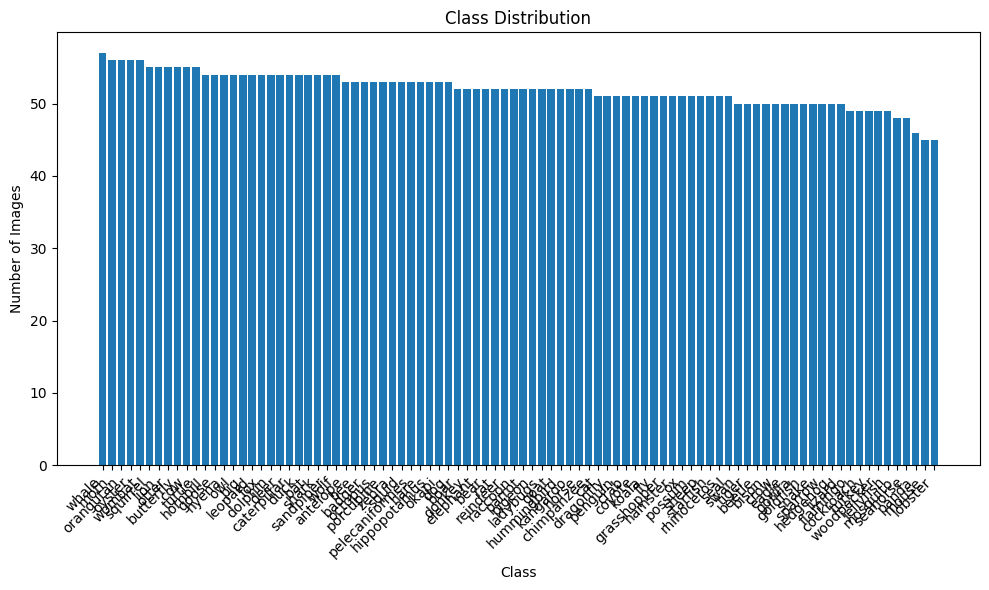

In [89]:
# Count how many samples belong to each class
class_counts = df['classes'].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)

# Rotate the x-axis labels if you have many classes or long class names
plt.xticks(rotation=45, ha='right')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

the dataset appears to be well-balanced, with most classes having a fairly even number of images, generally ranging between 45 and 57 images per class. This kind of distribution is ideal for image classification tasks, as it helps ensure the model does not become biased toward overrepresented classes.

- #### Image Dimension Distribution:

as datasets often contain images with varying sizes and aspect ratios. Inconsistent dimensions can lead to issues during model training, particularly when batching data or feeding images into convolutional neural networks that require fixed input sizes. By examining the distribution of image widths and heights, I can decide on an appropriate target size for resizing and identify any unusually small, large, or distorted images. Standardizing image dimensions ensures consistent model input, improves training stability, and can enhance overall model performance. I decided not to standardize them. Most deep learning frameworks and image processing pipelines handle resizing internally during data loading or augmentation, making it unnecessary to manually enforce uniform dimensions across the dataset. Since the images vary only slightly in size and there are no extreme outliers, I chose to retain the original dimensions to preserve the natural aspect ratios and visual quality of the data.

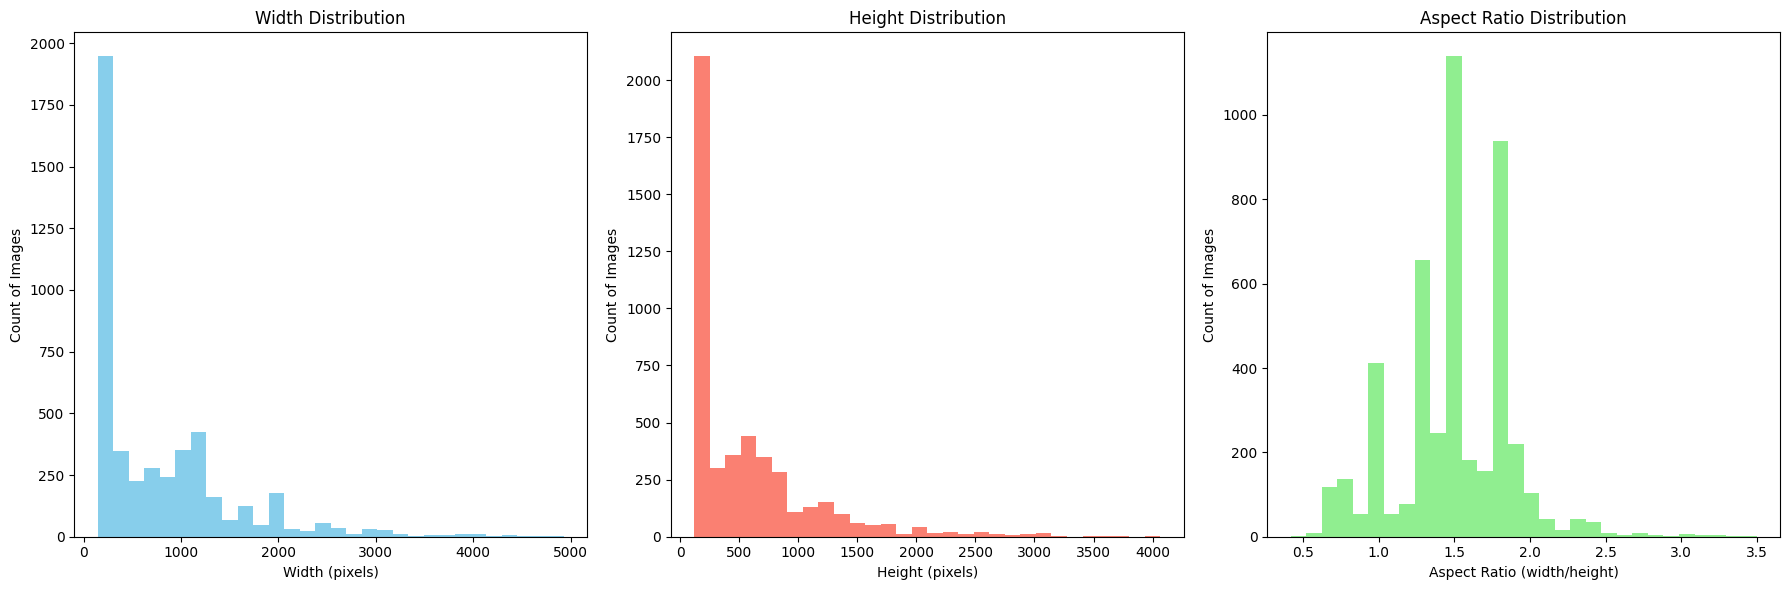

In [94]:
# Lists to store extracted dimensions
widths = []
heights = []
aspect_ratios = []

# Loop through each image in df
for idx, row in df.iterrows():
    img_path = row['directory']
    try:
        # Safely open the image and retrieve its size
        with Image.open(img_path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
            aspect_ratios.append(w / h if h != 0 else 0)
    except Exception as e:
        # In case there's an issue reading a file
        print(f"Warning: Could not process {img_path}. Error: {e}")

# Create subplots: one for width, one for height, one for aspect ratio
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for image widths
axes[0].hist(widths, bins=30, color='skyblue')
axes[0].set_title('Width Distribution')
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Count of Images')

# Histogram for image heights
axes[1].hist(heights, bins=30, color='salmon')
axes[1].set_title('Height Distribution')
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Count of Images')

# Histogram for aspect ratios
axes[2].hist(aspect_ratios, bins=30, color='lightgreen')
axes[2].set_title('Aspect Ratio Distribution')
axes[2].set_xlabel('Aspect Ratio (width/height)')
axes[2].set_ylabel('Count of Images')

plt.tight_layout()
plt.show()

- #### Image Dimension Distribution:

Analyzing global pixel intensity provides insight into the overall brightness and contrast characteristics of an image classification dataset. By examining the distribution of pixel values across all images, you can detect patterns such as underexposure, overexposure, or poor contrast that may affect model performance. This analysis helps ensure that the dataset has a healthy range of brightness levels and can reveal the need for normalization or preprocessing adjustments. In this case, the pixel intensity distribution appeared normal and well-spread, so no additional preprocessing was necessary.

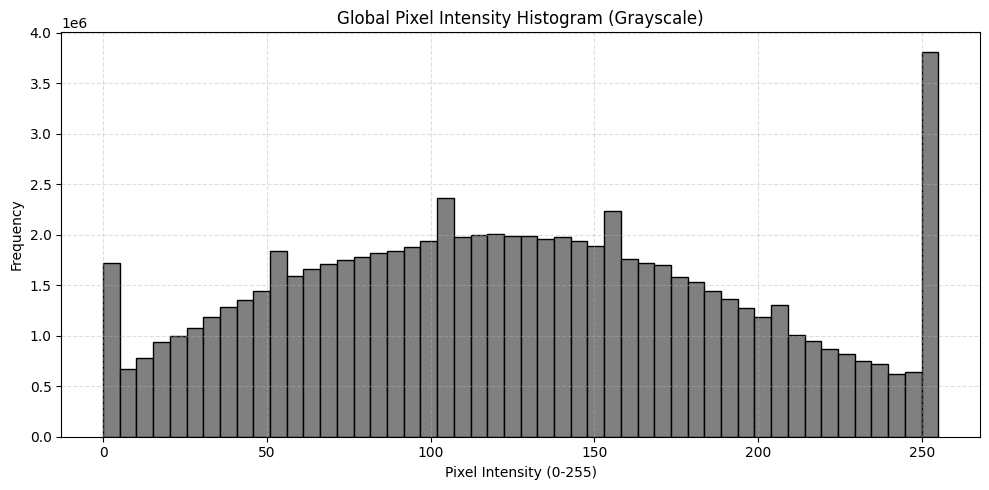

In [92]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Settings
resize_size = (128, 128)  # optional resizing for faster processing
pixel_values = []

# Loop through the image paths in the DataFrame
for path in df['directory']:
    try:
        with Image.open(path) as img:
            img = img.resize(resize_size, Image.Resampling.LANCZOS)
            img = img.convert('L')  # convert to grayscale
            pixels = np.array(img).ravel()  # flatten to 1D
            pixel_values.extend(pixels)
    except Exception as e:
        print(f"Error processing {path}: {e}")

# Convert to numpy array
pixel_values = np.array(pixel_values)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(pixel_values, bins=50, color='gray', edgecolor='black')
plt.title("Global Pixel Intensity Histogram (Grayscale)")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Based on this global pixel intensity histogram, the grayscale values in the dataset are relatively well-distributed across the full 0–255 range, with noticeable peaks at both the lower and upper ends. This suggests that the dataset includes a variety of dark and bright regions, which may reflect natural lighting variation or image characteristics. Despite some clustering near the extremes, the overall spread appears reasonable and indicates sufficient contrast diversity. As a result, no additional normalization or intensity correction was deemed necessary prior to training the classification model.

## 5. Data pre processing

- #### Train/Validation/Test Split:

The dataset was partitioned into training, validation, and test subsets to support model development, tuning, and evaluation. A two-stage random splitting strategy was used to ensure controlled proportions across subsets while preserving reproducibility. Indexes were reset post-split to maintain clean and consistent data structures, and the distribution of samples across the splits was confirmed. This structured division enables effective training, hyperparameter optimization, and unbiased performance assessment.

In [13]:
# Split into train/val/test
train_df, temp_df = train_test_split(df, train_size=0.70, shuffle=True, random_state=42)
val_df, test_df = train_test_split(temp_df, train_size=0.70, shuffle=True, random_state=42)

train_df = train_df.reset_index(drop=True)
val_df   = val_df.reset_index(drop=True)
test_df  = test_df.reset_index(drop=True)

print("Train size:", len(train_df))
print("Val size:", len(val_df))
print("Test size:", len(test_df))

Train size: 3779
Val size: 1134
Test size: 487


- #### Data Augmentation:

Data augmentation is a  technique in image classification that involves creating modified versions of existing images to artificially expand the training dataset. By applying transformations such as rotation, flipping, zooming, shifting, or brightness adjustments, augmentation introduces variability that helps the model generalize better to unseen data. It reduces overfitting, improves robustness, and enhances performance, especially when working with limited data. In this project, data augmentation was used to increase the diversity of training samples while preserving the core features necessary for accurate classification.

In [14]:
# Create an ImageDataGenerator instance with specific data augmentation settings
data_augmentation = ImageDataGenerator(
    rotation_range=30,      # Randomly rotate images up to 30 degrees
    brightness_range=None,  # No brightness adjustment (if provided, e.g. (0.8, 1.2), would vary brightness)
    shear_range=0.2,        # Shear transformation by up to 20% (slanting effect)
    zoom_range=0.2,         # Randomly zoom in/out by up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally (mirror them)
)


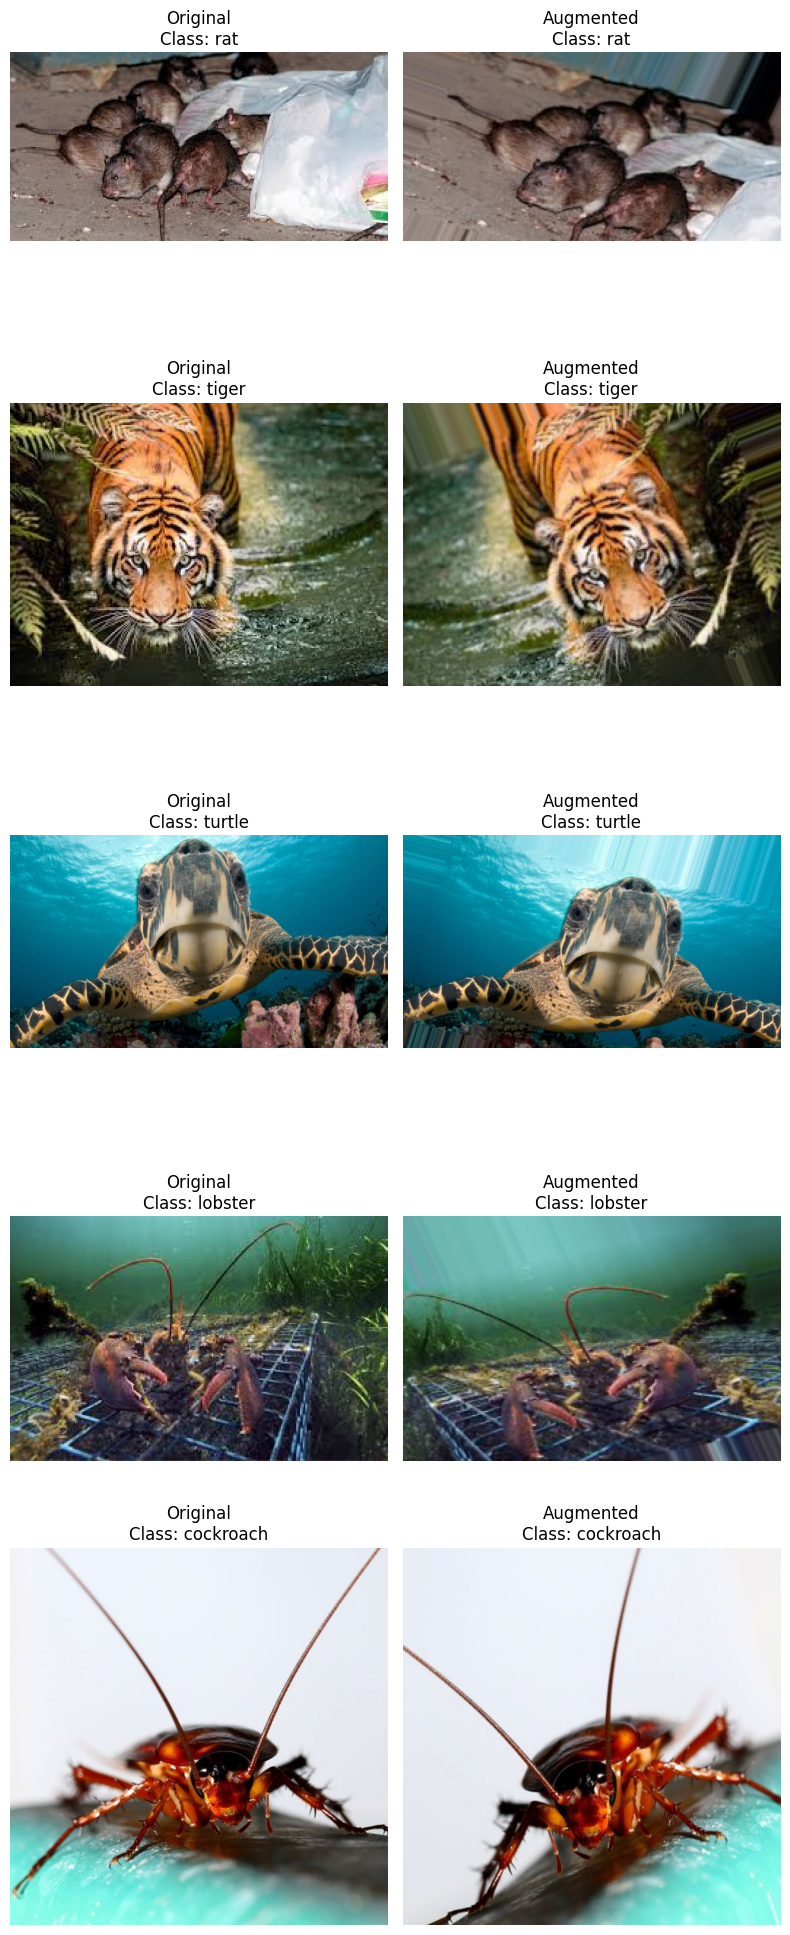

In [15]:
# Number of samples to show
num_to_show = 5

# Randomly pick indices from your DataFrame
random_indices = random.sample(range(len(df)), num_to_show)

# Create a figure with rows = num_to_show, 2 columns (original vs. augmented)
fig, axes = plt.subplots(nrows=num_to_show, ncols=2, figsize=(8, 4*num_to_show))

for i, idx in enumerate(random_indices):
    # File path & class label
    img_path = df.loc[idx, "directory"]
    label    = df.loc[idx, "classes"]
    
    # Load as PIL Image in RGB
    pil_img = Image.open(img_path).convert('RGB')
    arr_img = np.array(pil_img)  # shape (H, W, 3)

    # Generate a single augmented image
    # We expand dims to make shape (1, H, W, 3), required by .flow()
    aug_iter = data_augmentation.flow(
        np.expand_dims(arr_img, axis=0),
        batch_size=1
    )
    
    # Retrieve the augmented image (returns a batch of size=1, so we take [0])
    aug_img = next(aug_iter)[0].astype(np.uint8)

    # Display the original image
    axes[i, 0].imshow(pil_img)
    axes[i, 0].set_title(f"Original\nClass: {label}")
    axes[i, 0].axis('off')
    
    # Display the augmented image
    axes[i, 1].imshow(aug_img)
    axes[i, 1].set_title(f"Augmented\nClass: {label}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

- #### Create Tensor Flow Dataset:

A data loading pipeline was established using generators to efficiently feed image data into the model during training, validation, and testing. Each generator was configured to read image file paths and associated class labels from structured DataFrames, applying consistent preprocessing and augmentation transformations as defined by the augmentation strategy. Images were resized to a uniform target size and encoded using categorical labels suitable for multi-class classification. The generators ensured that data was loaded in batches, enabling scalable training and evaluation while maintaining consistency across all phases of the workflow.

In [16]:



# Build a training data generator that reads file paths/labels from train_df,
# applies the given ImageDataGenerator (data_augmentation), and uses the list of labels.
train_dataset = data_augmentation.flow_from_dataframe(
    train_df,
    x_col='directory',
    y_col='classes',
    classes=labels,
    class_mode='categorical',
    target_size=img_size,
    color_mode='rgb',
    batch_size=batch_size,
    shuffle=False,
)
val_dataset = data_augmentation.flow_from_dataframe(
    val_df,
    x_col='directory',
    y_col='classes',
    classes=labels,
    class_mode='categorical',
    target_size=img_size,
    color_mode='rgb',
    batch_size=batch_size,
    shuffle=False,
)
test_dataset = data_augmentation.flow_from_dataframe(
    test_df,
    x_col='directory',
    y_col='classes',
    classes=labels,
    class_mode='categorical',
    target_size=img_size,
    color_mode='rgb',
    batch_size=batch_size,
    shuffle=False,
)

Found 3779 validated image filenames belonging to 90 classes.
Found 1134 validated image filenames belonging to 90 classes.
Found 487 validated image filenames belonging to 90 classes.


## 6. Model Training and Hyperparameter Tuning

For model training and hyperparameter testing, a structured approach was followed to evaluate different configurations and identify the most effective setup. A base architecture was selected and extended with custom dense layers, followed by the application of multiple training scenarios that varied key hyperparameters such as the number of hidden units and dropout rates. Each configuration was trained independently using the same data splits and optimization settings, and early stopping was applied to prevent overfitting. Performance metrics were recorded and compared across scenarios, allowing for the selection of the best-performing model based on validation accuracy and generalization ability.

For model training and hyperparameter testing, two pretrained architectures EfficientNetV2B0 and ResNet50 were fine-tuned and evaluated. Each model was tested under four different scenarios, varying key hyperparameters such as the number of hidden units (128 and 256) and dropout rates (0.3 and 0.5). This resulted in a total of eight unique training configurations. Early stopping was employed to prevent overfitting, and validation accuracy was used as the primary metric for comparison. By systematically testing these combinations, the best-performing model and configuration were identified based on their ability to generalize effectively to unseen data.


- ### Test Run:

In [7]:


# 1. Create a base model (EfficientNetV2B0) initialized with ImageNet weights
#    - include_top=False: removes the default classification head
#    - weights='imagenet': loads pretrained weights on ImageNet
#    - pooling='max': applies a Global Max Pooling on the extracted features
base_model = EfficientNetV2B0(
    include_top=False,     #include_top=False: removes the default classification head
    weights='imagenet',    # loads pretrained weights on ImageNet
    pooling='max'          #applies a Global Max Pooling on the extracted features
)

# 2. Freeze the base model so its layers will NOT be updated during training
base_model.trainable = False 

# 3. Build the final model using Sequential
#    - First Input layer defines the shape (224x224x3 if using img_size = (224,224))
#    - base_model: the pretrained EfficientNetV2B0 (as a feature extractor)
#    - Dense, BatchNormalization, Dropout: additional custom layers to learn
#      new classification patterns
#    - Final Dense layer: has 90 neurons (change to match your # of classes)
#      and uses 'softmax' activation for multi-class classification.
model = Sequential([
    layers.Input(shape=(224, 224, 3)),
    base_model,
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(90, activation='softmax')    
])

# Display a summary of the model architecture
model.summary()

# 4. Compile the model
# Adam optimizer with learning_rate=1e-4
# Categorical Crossentropy loss for multi-class tasks

model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# 5. Create an EarlyStopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,                  # patience=3 => if val_loss doesn't improve for 5 epochs, training stops
    restore_best_weights=True    #  revert model to the best (lowest val_loss) weights
)

# 6. Train the model

#    - epochs=100 (stopped earlier if val_loss stops improving for 5 epochs)
#    - callbacks=early_stopping to enable Early Stopping
#    - verbose=1 to print training progress
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=val_dataset,
    callbacks=[early_stopping],
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)       │ (None, 1280)                │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 90)                  │          23,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,338,218 (24.18 MB)

 Trainable params: 417,882 (1.59 MB)

 Non-trainable params: 5,920,336 (22.58 MB)

Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 85s 646ms/step - accuracy: 0.0228 - loss: 5.2088 - val_accuracy: 0.1578 - val_loss: 3.7962
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 74s 621ms/step - accuracy: 0.1150 - loss: 3.9769 - val_accuracy: 0.4586 - val_loss: 2.7378
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 78s 656ms/step - accuracy: 0.2829 - loss: 3.1317 - val_accuracy: 0.5855 - val_loss: 2.1347
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 76s 641ms/step - accuracy: 0.4333 - loss: 2.4913 - val_accuracy: 0.6975 - val_loss: 1.7066
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 73s 617ms/step - accuracy: 0.5084 - loss: 2.1085 - val_accuracy: 0.7160 - val_loss: 1.4446
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 72s 605ms/step - accuracy: 0.5681 - loss: 1.8474 - val_accuracy: 0.7601 - val_loss: 1.2322
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 75s 630ms/step - accuracy: 0.6330 - loss: 1.5749 - val_accuracy: 0.7901 - val_loss: 1.0742
Epoch 8/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 74s 619ms/step - accuracy: 0.7039 -

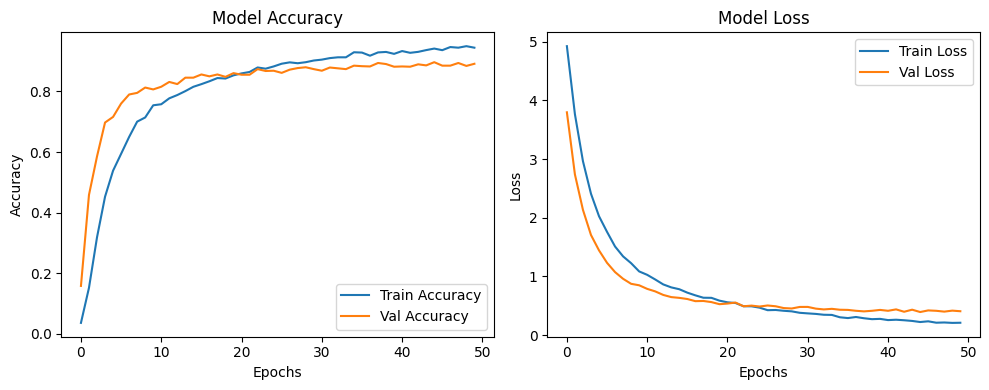

In [8]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

- ### Model 1 Training and Hyper parameter Testing: EfficientNetV2B0:

- #### about EfficientNetV2B0

EfficientNetV2B0 is a lightweight and efficient convolutional neural network architecture developed by Google as part of the EfficientNetV2 family. It is designed to achieve high accuracy while maintaining low computational cost, making it well-suited for image classification tasks on resource-constrained environments. EfficientNetV2B0 builds upon the original EfficientNet by incorporating improved training techniques and a more optimized compound scaling method, which balances network depth, width, and resolution. It comes pretrained on the ImageNet dataset, allowing it to serve effectively as a feature extractor in transfer learning applications. In this project, EfficientNetV2B0 was used as the base model with its weights frozen, enabling fast and stable training of custom classification layers on top.




=== Scenario 1 ===
-> Hidden Units: 128
-> Dropout Rate: 0.3

=== Scenario 2 ===
-> Hidden Units: 128
-> Dropout Rate: 0.5


=== Scenario 3 ===
-> Hidden Units: 256
-> Dropout Rate: 0.5


=== Scenario 4 ===
-> Hidden Units: 256
-> Dropout Rate: 0.5

This code implements a systematic approach to model tuning by testing multiple training scenarios using the EfficientNetV2B0 architecture as a fixed feature extractor. The base model is initialized with ImageNet weights and its layers are frozen to preserve learned features. A custom classifier head is added with configurable hyperparameters: the number of hidden units and dropout rate. The code defines a function to build and compile the model, then iterates over combinations of hidden units (128 and 256) and dropout rates (0.3 and 0.5), resulting in four unique scenarios. Each model is trained using early stopping to prevent overfitting, and the training history is stored for analysis. The model with the highest validation accuracy is identified and saved separately as the best-performing configuration. This structure enables efficient hyperparameter exploration and automated model selection.

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetV2B0


base_model = EfficientNetV2B0(
    include_top=False,     #include_top=False: removes the default classification head
    weights='imagenet',    # loads pretrained weights on ImageNet
    pooling='max'          #applies a Global Max Pooling on the extracted features
)
base_model.trainable = False



def build_model(hidden_units, dropout_rate, base_model, num_classes=90):
    """Builds and returns a compiled model with the specified hyperparameters."""
    scenario_model = Sequential([
        layers.Input(shape=(224, 224, 3)),
        base_model,
        layers.Dense(hidden_units, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(hidden_units, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    scenario_model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return scenario_model


# EarlyStopping callback (same as before)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  
    restore_best_weights=True
)

hidden_units_options = [128, 256]    
dropout_rate_options = [0.3, 0.5]    

best_val_accuracy = -float('inf')
best_scenario = None
best_model = None

EfficientNetV2B0_histories = {}
scenario_id = 1

for hidden_units in hidden_units_options:
    for dropout_rate in dropout_rate_options:
        print(f"\n=== Scenario {scenario_id} ===")
        print(f"-> Hidden Units: {hidden_units}")
        print(f"-> Dropout Rate: {dropout_rate}")

        # Build a fresh model for this scenario
        scenario_model = build_model(hidden_units, dropout_rate, base_model=base_model, num_classes=90)

        # Train the model
        train_results = scenario_model.fit(
            train_dataset,
            epochs=100,
            validation_data=val_dataset,
            callbacks=[early_stopping],
            verbose=1
        )

        # Store the training history for later analysis
        EfficientNetV2B0_histories[scenario_id] = train_results.history
        
        # Check the best validation accuracy from this scenario
        scenario_val_accuracy = max(train_results.history['val_accuracy'])

        # Save the model
        model_save_path = f"model_scenario_{scenario_id}.keras"
        scenario_model.save(model_save_path)
        print(f"Model saved to {model_save_path}")

        # Update 'best' model if needed
        if scenario_val_accuracy > best_val_accuracy:
            best_val_accuracy = scenario_val_accuracy
            best_scenario = (hidden_units, dropout_rate, scenario_id)
            best_model = scenario_model

        scenario_id += 1

print("\n=== Best Scenario ===")
print(f"Hidden Units: {best_scenario[0]}")
print(f"Dropout Rate: {best_scenario[1]}")
print(f"Scenario ID: {best_scenario[2]}")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

# Save the best model
best_model.save("best_model.h5")
print("Best model saved to best_model.h5")


=== Scenario 1 ===
-> Hidden Units: 128
-> Dropout Rate: 0.3
Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 67s 503ms/step - accuracy: 0.0133 - loss: 5.1561 - val_accuracy: 0.0450 - val_loss: 4.2796
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 59s 492ms/step - accuracy: 0.0489 - loss: 4.4611 - val_accuracy: 0.1905 - val_loss: 3.6744
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 68s 570ms/step - accuracy: 0.1023 - loss: 3.9545 - val_accuracy: 0.3280 - val_loss: 3.2003
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 78s 655ms/step - accuracy: 0.1923 - loss: 3.5208 - val_accuracy: 0.4586 - val_loss: 2.8798
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 81s 680ms/step - accuracy: 0.2576 - loss: 3.2061 - val_accuracy: 0.5353 - val_loss: 2.5454
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 76s 639ms/step - accuracy: 0.3520 - loss: 2.8634 - val_accuracy: 0.5758 - val_loss: 2.2836
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 73s 616ms/step - accuracy: 0.4185 - loss: 2.6224 - val_accuracy: 0.6305 - val_loss: 2.0582
Epoch 8/100
11

Model saved to model_scenario_4.keras

=== Best Scenario ===
Hidden Units: 256
Dropout Rate: 0.3
Scenario ID: 3
Best Validation Accuracy: 0.8915
Best model saved to best_model.h5


In [20]:
import csv

# Loop through scenario IDs 1 to 4
for s_id in range(1, 5):
    # Retrieve the stored history for this scenario
    history_dict = EfficientNetV2B0_histories[s_id]

    # Construct the CSV filename
    csv_filename = f"history_scenario_{s_id}.csv"

    with open(csv_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # The keys in history_dict typically include: 
        # 'loss', 'val_loss', 'accuracy', 'val_accuracy', etc.
        metric_keys = list(history_dict.keys())

        # Write a header row: epoch + each metric key
        writer.writerow(["epoch"] + metric_keys)

        # Each metric is a list of floats (one per epoch)
        num_epochs = len(history_dict['loss'])
        for epoch_idx in range(num_epochs):
            row = [epoch_idx + 1]  # 1-based epoch indexing
            for key in metric_keys:
                row.append(history_dict[key][epoch_idx])
            writer.writerow(row)

    print(f"Scenario {s_id} history saved to: {csv_filename}")

Scenario 1 history saved to: history_scenario_1.csv
Scenario 2 history saved to: history_scenario_2.csv
Scenario 3 history saved to: history_scenario_3.csv
Scenario 4 history saved to: history_scenario_4.csv


- ### Model 1 Validation Results: EfficientNetV2B0:

This code generates training and validation performance plots for each EfficientNetV2B0 training scenario that was tested. It begins by mapping each scenario ID to its corresponding configuration of hidden units and dropout rate. For each scenario stored in the training history, it extracts the final accuracy and loss values and creates side-by-side plots showing how accuracy and loss evolved over the training epochs. The titles of the plots include the scenario number, configuration details, and final metrics, making it easy to visually compare how different settings affected model performance. This approach helps identify which hyperparameter combinations led to better accuracy and more stable training.

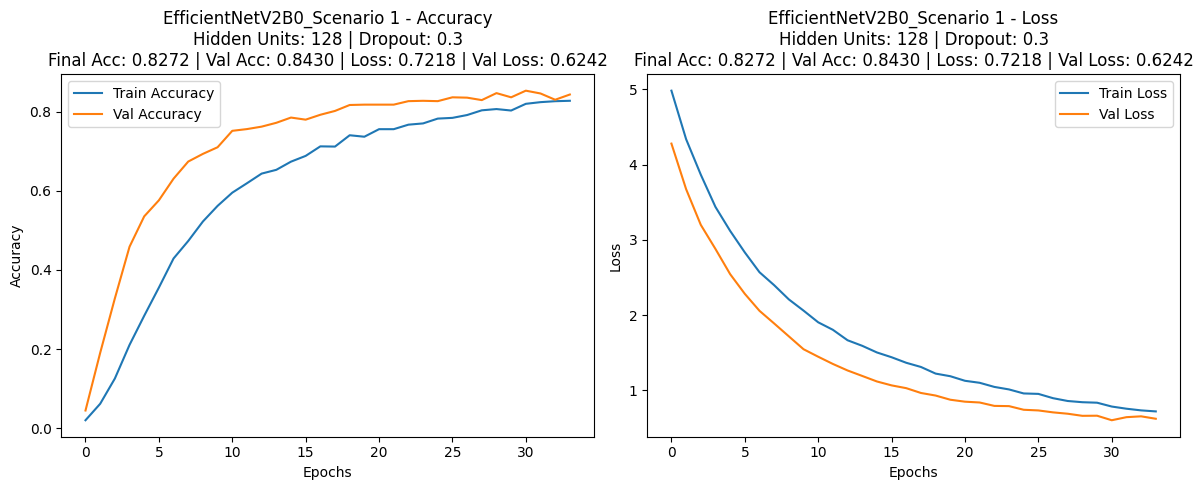

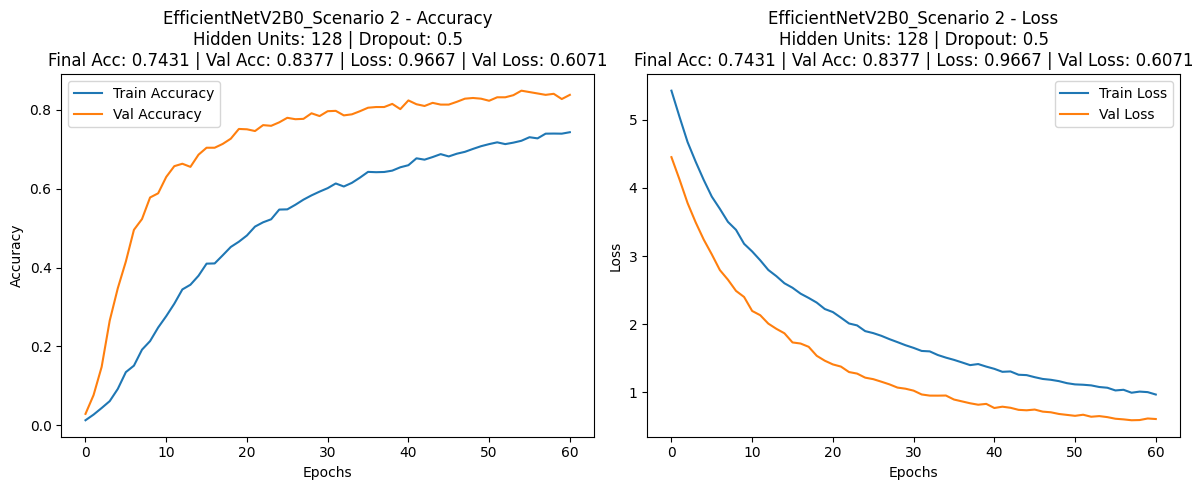

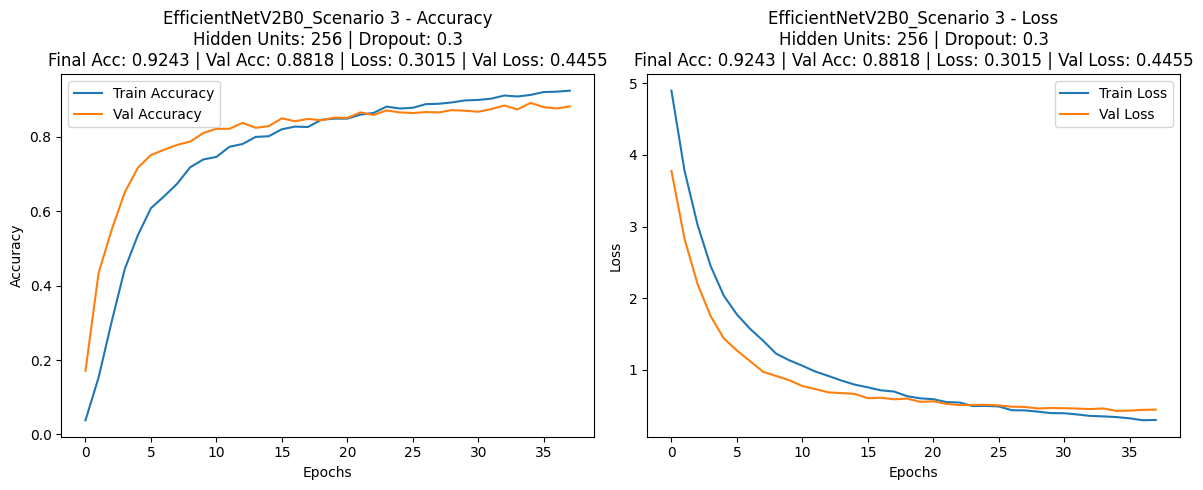

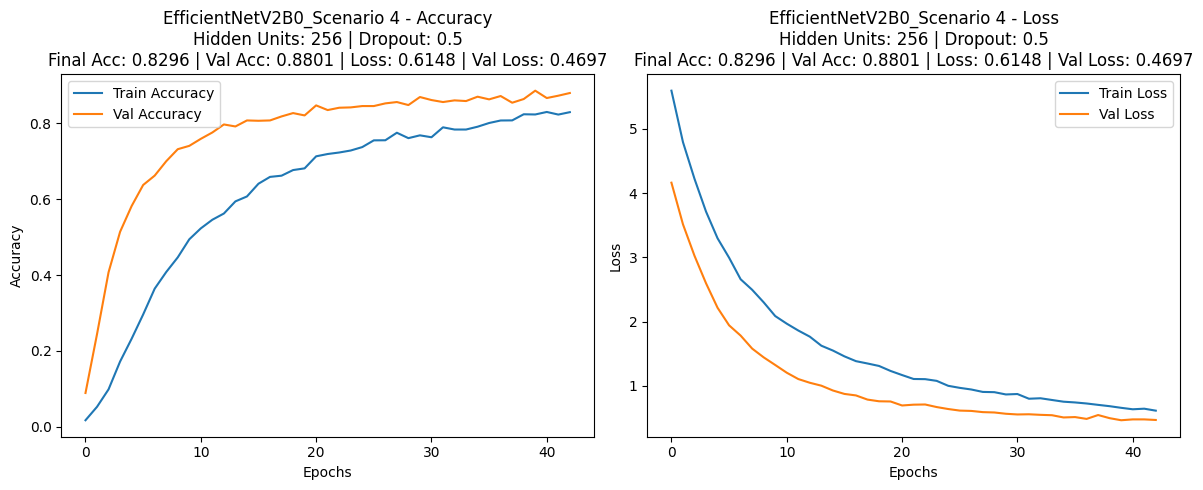

In [49]:
# Map scenario IDs to their config details
scenario_configs = {
    1: {'hidden_units': 128, 'dropout_rate': 0.3},
    2: {'hidden_units': 128, 'dropout_rate': 0.5},
    3: {'hidden_units': 256, 'dropout_rate': 0.3},
    4: {'hidden_units': 256, 'dropout_rate': 0.5}
}

# Plot each scenario
for i in EfficientNetV2B0_histories:
    history = EfficientNetV2B0_histories[i]
    config = scenario_configs.get(i, {})
    hu = config.get('hidden_units', '?')
    dr = config.get('dropout_rate', '?')

    # Get final metrics
    final_acc = history['accuracy'][-1]
    final_val_acc = history['val_accuracy'][-1]
    final_loss = history['loss'][-1]
    final_val_loss = history['val_loss'][-1]

    # Format metric summary for title/subtitle
    metric_summary = (
        f"Final Acc: {final_acc:.4f} | Val Acc: {final_val_acc:.4f} | "
        f"Loss: {final_loss:.4f} | Val Loss: {final_val_loss:.4f}"
    )

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Val Accuracy')
    plt.title(f"EfficientNetV2B0_Scenario {i} - Accuracy\nHidden Units: {hu} | Dropout: {dr}\n{metric_summary}")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title(f"EfficientNetV2B0_Scenario {i} - Loss\nHidden Units: {hu} | Dropout: {dr}\n{metric_summary}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


The training and validation curves shown for EfficientNetV2B0 Scenarios 3 and 4 provide a detailed view of how both configurations performed across epochs. Scenario 3 (256 hidden units, 0.3 dropout) achieved the highest final accuracy, with training accuracy reaching 92.4% and validation accuracy 88.2%, accompanied by the lowest validation loss (0.4455). The learning curves in Scenario 3 demonstrate stable and efficient convergence, with minimal overfitting, as the training and validation metrics stay close throughout training.

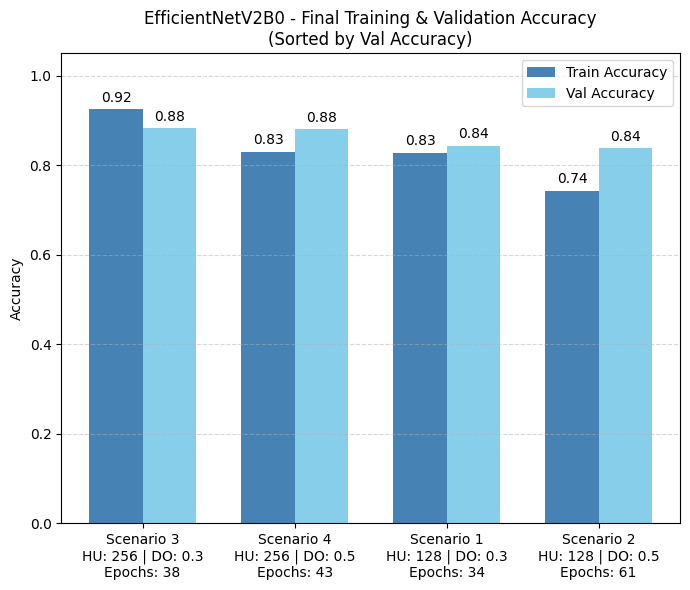

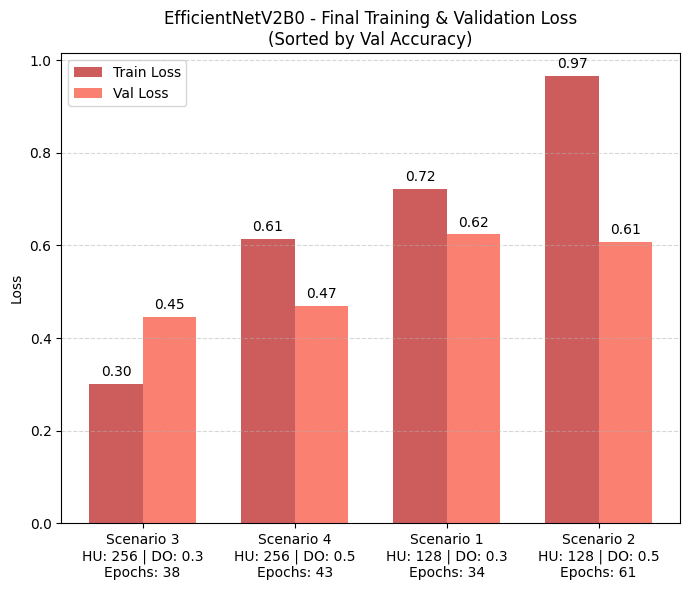

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Model name for display
model_name = "EfficientNetV2B0"

# Scenario configurations
scenario_configs = {
    1: {'hidden_units': 128, 'dropout_rate': 0.3},
    2: {'hidden_units': 128, 'dropout_rate': 0.5},
    3: {'hidden_units': 256, 'dropout_rate': 0.3},
    4: {'hidden_units': 256, 'dropout_rate': 0.5}
}

# Step 1: Gather data
scenarios = []

for i in sorted(EfficientNetV2B0_histories.keys()):
    history = EfficientNetV2B0_histories[i]
    train_acc = history['accuracy'][-1]
    val_acc = history['val_accuracy'][-1]
    train_loss = history['loss'][-1]
    val_loss = history['val_loss'][-1]
    epochs_trained = len(history['loss'])  # total epochs this scenario trained
    config = scenario_configs.get(i, {})
    scenarios.append({
        'id': i,
        'label': (
            f"Scenario {i}\n"
            f"HU: {config.get('hidden_units')} | DO: {config.get('dropout_rate')}\n"
            f"Epochs: {epochs_trained}"
        ),
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_loss': train_loss,
        'val_loss': val_loss
    })

# Step 2: Sort by validation accuracy
scenarios_sorted = sorted(scenarios, key=lambda x: x['val_acc'], reverse=True)

# Step 3: Extract values for plotting
labels = [s['label'] for s in scenarios_sorted]
train_acc = [s['train_acc'] for s in scenarios_sorted]
val_acc = [s['val_acc'] for s in scenarios_sorted]
train_loss = [s['train_loss'] for s in scenarios_sorted]
val_loss = [s['val_loss'] for s in scenarios_sorted]
x = np.arange(len(labels))
width = 0.35

# === Accuracy Bar Chart ===
plt.figure(figsize=(7, 6))
plt.bar(x - width/2, train_acc, width, label='Train Accuracy', color='steelblue')
plt.bar(x + width/2, val_acc, width, label='Val Accuracy', color='skyblue')

# Add value labels
for i in range(len(x)):
    plt.text(x[i] - width/2, train_acc[i] + 0.01, f"{train_acc[i]:.2f}", ha='center', va='bottom')
    plt.text(x[i] + width/2, val_acc[i] + 0.01, f"{val_acc[i]:.2f}", ha='center', va='bottom')

plt.ylabel("Accuracy")
plt.title(f"{model_name} - Final Training & Validation Accuracy\n(Sorted by Val Accuracy)")
plt.xticks(x, labels, rotation=0)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === Loss Bar Chart ===
plt.figure(figsize=(7, 6))
plt.bar(x - width/2, train_loss, width, label='Train Loss', color='indianred')
plt.bar(x + width/2, val_loss, width, label='Val Loss', color='salmon')

# Add value labels
for i in range(len(x)):
    plt.text(x[i] - width/2, train_loss[i] + 0.01, f"{train_loss[i]:.2f}", ha='center', va='bottom')
    plt.text(x[i] + width/2, val_loss[i] + 0.01, f"{val_loss[i]:.2f}", ha='center', va='bottom')

plt.ylabel("Loss")
plt.title(f"{model_name} - Final Training & Validation Loss\n(Sorted by Val Accuracy)")
plt.xticks(x, labels, rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



The visualizations summarize the performance of EfficientNetV2B0 under four different training scenarios, each with varying hyperparameters for hidden units (HU) and dropout rates (DO). The top chart presents final training and validation accuracy, sorted by validation accuracy. Scenario 3 (256 HU, 0.3 DO) achieved the highest performance, with 0.92 training accuracy and 0.88 validation accuracy, indicating strong generalization. Scenario 4, with the same number of hidden units but higher dropout, also performed well, though slightly less so. The two configurations with 128 hidden units (Scenarios 1 and 2) trailed in accuracy, particularly Scenario 2, which exhibited the largest gap between training and validation performance.

The bottom chart displays the corresponding training and validation loss values. Again, Scenario 3 showed the lowest loss, reinforcing its status as the best-performing configuration. Notably, Scenario 2 had the highest training loss and validation loss, suggesting underfitting or a suboptimal combination of hyperparameters. These results highlight that increasing the model’s capacity (i.e., more hidden units) and using a moderate dropout rate (0.3) contributed to better learning and generalization in this setting.

- ### Model 2 Training and Hyper parameter Testing: ResNet50:

- #### about ResNet50

ResNet50 is a widely used deep convolutional neural network known for introducing the concept of residual learning through skip connections. These residual blocks allow gradients to flow more easily during backpropagation, enabling the training of much deeper networks without suffering from vanishing gradients. ResNet50 consists of 50 layers and has been pretrained on ImageNet, making it a strong candidate for transfer learning in image classification tasks. Compared to EfficientNetV2B0, which emphasizes parameter efficiency and optimized scaling of depth, width, and resolution, ResNet50 is generally heavier in terms of model size and computation. While EfficientNetV2B0 achieves competitive accuracy with fewer parameters and faster training times, ResNet50 is often favored for its stability, simplicity, and consistent performance across a variety of vision tasks. In this project, both models were evaluated to compare their performance under identical training scenarios.










This code performs a structured hyperparameter search using the ResNet50 architecture as the base model for an image classification task. ResNet50 is loaded with pretrained ImageNet weights, excluding its top classification layers, and its weights are frozen to preserve learned features during training. A custom classification head is added with two dense layers, batch normalization, and dropout. The model is compiled and trained under four different configurations by varying the number of hidden units (128 and 256) and dropout rates (0.3 and 0.5). Early stopping is used to prevent overfitting, and training history is stored for each scenario. The model achieving the highest validation accuracy is identified, saved separately, and reported as the best-performing configuration. This code enables efficient experimentation to determine the most effective hyperparameter setup for the given classification task using ResNet50.

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50  # <-- Use ResNet50 instead of EfficientNetV2B0

# Create the ResNet50 base model
# - include_top=False removes the default classification head
# - weights='imagenet' loads pretrained ImageNet weights
# - pooling='max' applies Global Max Pooling
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    pooling='max'
)

# Freeze the base model so its weights won't be updated during training
base_model.trainable = False

def build_model(hidden_units, dropout_rate, base_model, num_classes=90):
    """Builds and returns a compiled model with the specified hyperparameters."""
    scenario_model = Sequential([
        layers.Input(shape=(224, 224, 3)),
        base_model,
        layers.Dense(hidden_units, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(hidden_units, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    scenario_model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return scenario_model

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

hidden_units_options = [128, 256]
dropout_rate_options = [0.3, 0.5]

best_val_accuracy = -float('inf')
best_scenario = None
best_model = None

ResNet50_histories = {}
scenario_id = 1

for hidden_units in hidden_units_options:
    for dropout_rate in dropout_rate_options:
        print(f"\n=== Scenario {scenario_id} ===")
        print(f"-> Hidden Units: {hidden_units}")
        print(f"-> Dropout Rate: {dropout_rate}")

        # Build a fresh model for this scenario
        scenario_model = build_model(hidden_units, dropout_rate, base_model=base_model, num_classes=90)

        # Train the model
        train_results = scenario_model.fit(
            train_dataset,
            epochs=100,
            validation_data=val_dataset,
            callbacks=[early_stopping],
            verbose=1
        )
        # Store the training history for later analysis
        ResNet50_histories[scenario_id] = train_results.history
        
        # Get the best validation accuracy from this scenario
        scenario_val_accuracy = max(train_results.history['val_accuracy'])

        # Save the model
        model_save_path = f"Res50_scenario_{scenario_id}.keras"
        scenario_model.save(model_save_path)
        print(f"Model saved to {model_save_path}")

        # Check if this scenario is better than our current best
        if scenario_val_accuracy > best_val_accuracy:
            best_val_accuracy = scenario_val_accuracy
            best_scenario = (hidden_units, dropout_rate, scenario_id)
            best_model = scenario_model

        scenario_id += 1

print("\n=== Best Scenario ===")
print(f"Hidden Units: {best_scenario[0]}")
print(f"Dropout Rate: {best_scenario[1]}")
print(f"Scenario ID: {best_scenario[2]}")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

# Save the best model
best_model.save("best_model.h5")
print("Best model saved to best_model.h5")



=== Scenario 1 ===
-> Hidden Units: 128
-> Dropout Rate: 0.3
Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 111s 894ms/step - accuracy: 0.0156 - loss: 5.1856 - val_accuracy: 0.0265 - val_loss: 4.5642
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.0366 - loss: 4.6957 - val_accuracy: 0.0626 - val_loss: 4.2119
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.0665 - loss: 4.2886 - val_accuracy: 0.1340 - val_loss: 3.8092
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.1087 - loss: 4.0116 - val_accuracy: 0.1834 - val_loss: 3.5667
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.1403 - loss: 3.7221 - val_accuracy: 0.2434 - val_loss: 3.3120
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.1829 - loss: 3.4920 - val_accuracy: 0.3069 - val_loss: 3.1142
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.2037 - loss: 3.3088 - val_accuracy: 0.3527 - val_loss: 2.8994
Epoch 8/100
119/119 ━━━━━

Model saved to Res50_scenario_4.keras

=== Best Scenario ===
Hidden Units: 256
Dropout Rate: 0.5
Scenario ID: 4
Best Validation Accuracy: 0.7646
Best model saved to best_model.h5


In [30]:
import csv

for scenario_id, history_dict in ResNet50_histories.items():
    csv_filename = f"ResNet50_history_scenario_{scenario_id}.csv"

    with open(csv_filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        metric_keys = list(history_dict.keys())
        writer.writerow(["epoch"] + metric_keys)

        num_epochs = len(history_dict['loss'])
        for epoch_idx in range(num_epochs):
            row = [epoch_idx + 1]
            for key in metric_keys:
                row.append(history_dict[key][epoch_idx])
            writer.writerow(row)

    print(f"Saved: {csv_filename}")

Saved: ResNet50_history_scenario_1.csv
Saved: ResNet50_history_scenario_2.csv
Saved: ResNet50_history_scenario_3.csv
Saved: ResNet50_history_scenario_4.csv


- ### Model 2 Validation Results: ResNet50:

This code generates training and validation performance plots for each EfficientNetV2B0 training scenario that was tested. It begins by mapping each scenario ID to its corresponding configuration of hidden units and dropout rate. For each scenario stored in the training history, it extracts the final accuracy and loss values and creates side-by-side plots showing how accuracy and loss evolved over the training epochs. The titles of the plots include the scenario number, configuration details, and final metrics, making it easy to visually compare how different settings affected model performance. This approach helps identify which hyperparameter combinations led to better accuracy and more stable training.

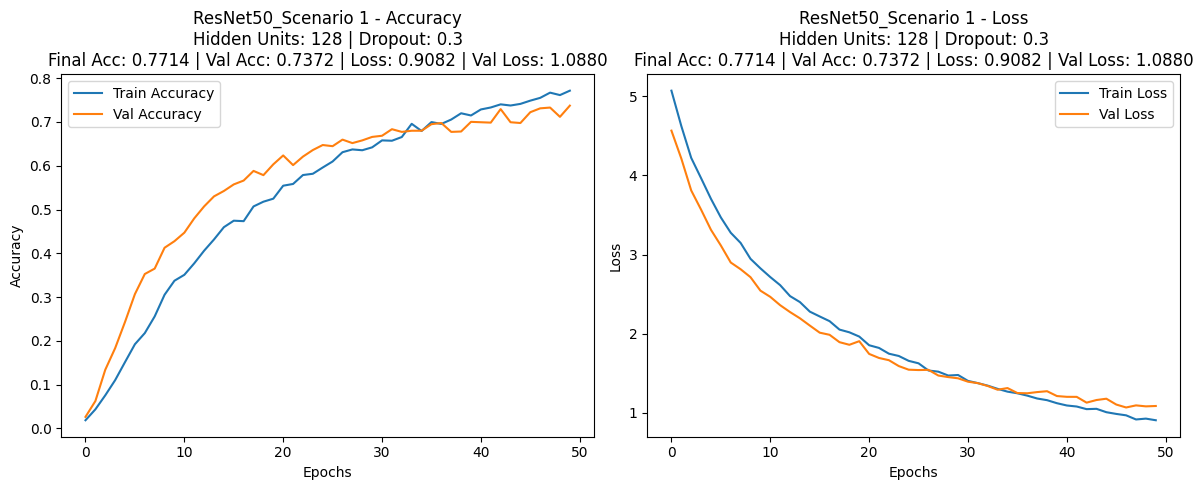

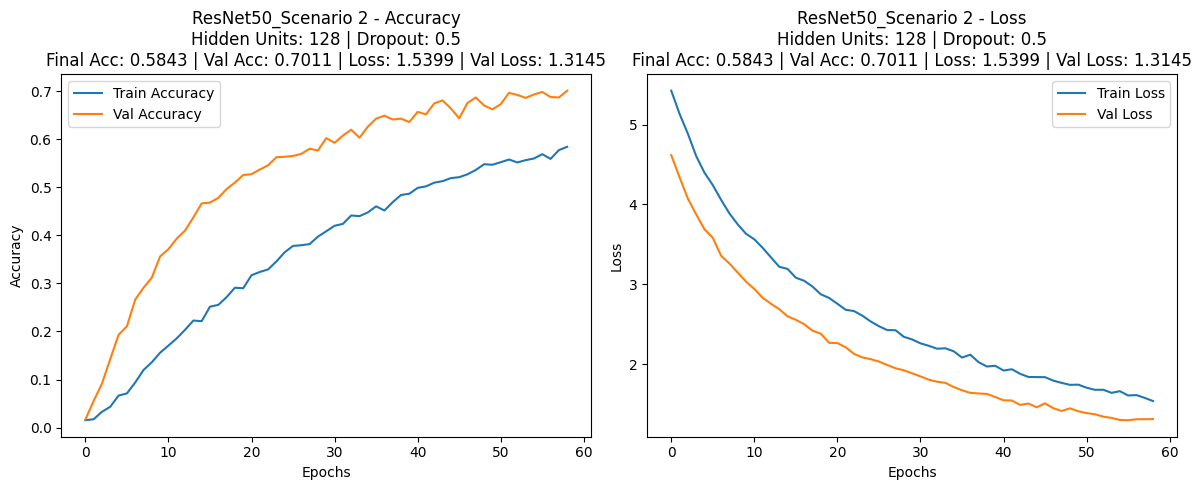

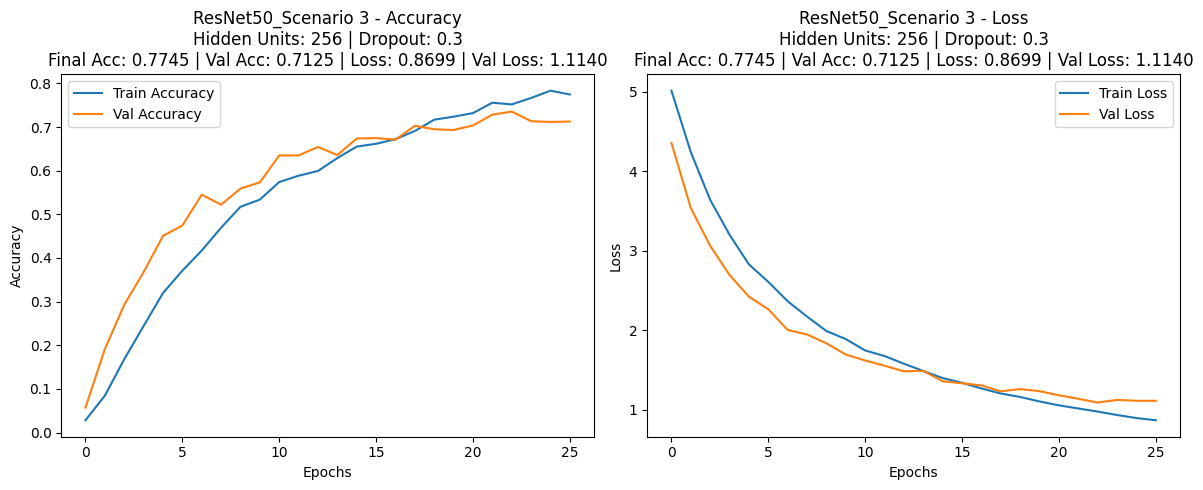

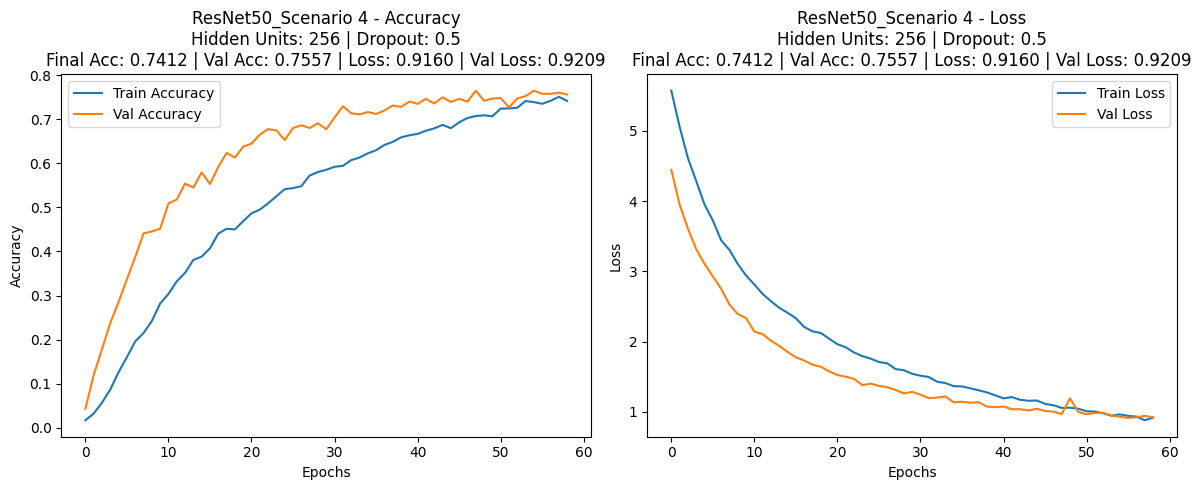

In [53]:
# Map scenario IDs to their config details
scenario_configs = {
    1: {'hidden_units': 128, 'dropout_rate': 0.3},
    2: {'hidden_units': 128, 'dropout_rate': 0.5},
    3: {'hidden_units': 256, 'dropout_rate': 0.3},
    4: {'hidden_units': 256, 'dropout_rate': 0.5}
}

# Plot each scenario
for i in EfficientNetV2B0_histories:
    history = ResNet50_histories[i]
    config = scenario_configs.get(i, {})
    hu = config.get('hidden_units', '?')
    dr = config.get('dropout_rate', '?')

    # Get final metrics
    final_acc = history['accuracy'][-1]
    final_val_acc = history['val_accuracy'][-1]
    final_loss = history['loss'][-1]
    final_val_loss = history['val_loss'][-1]

    # Format metric summary for title/subtitle
    metric_summary = (
        f"Final Acc: {final_acc:.4f} | Val Acc: {final_val_acc:.4f} | "
        f"Loss: {final_loss:.4f} | Val Loss: {final_val_loss:.4f}"
    )

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Val Accuracy')
    plt.title(f"ResNet50_Scenario {i} - Accuracy\nHidden Units: {hu} | Dropout: {dr}\n{metric_summary}")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title(f"ResNet50_Scenario {i} - Loss\nHidden Units: {hu} | Dropout: {dr}\n{metric_summary}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


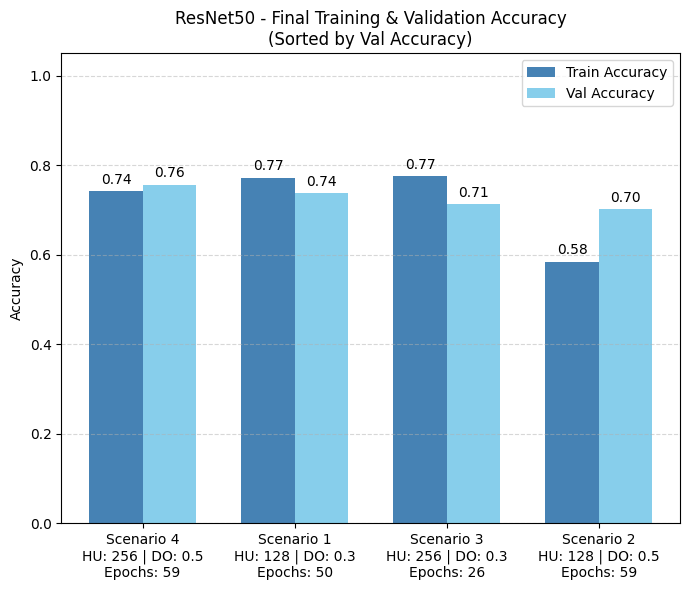

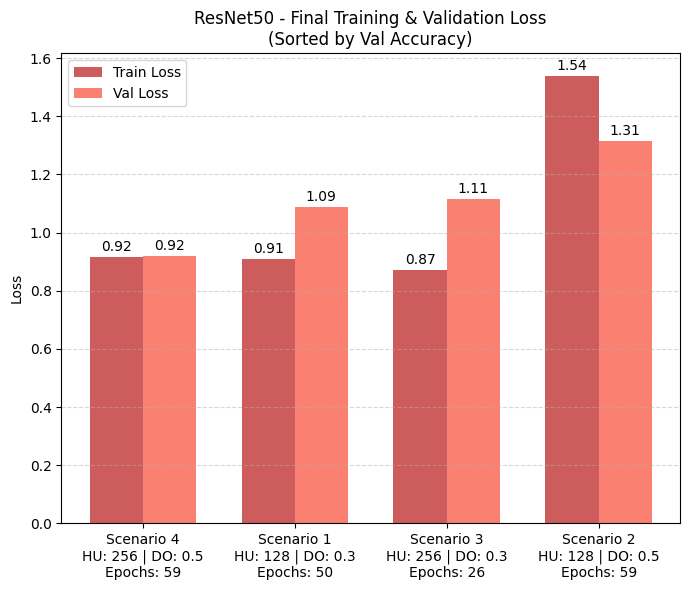

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Model name for display
model_name = "ResNet50"

# Scenario configurations
scenario_configs = {
    1: {'hidden_units': 128, 'dropout_rate': 0.3},
    2: {'hidden_units': 128, 'dropout_rate': 0.5},
    3: {'hidden_units': 256, 'dropout_rate': 0.3},
    4: {'hidden_units': 256, 'dropout_rate': 0.5}
}

# Step 1: Gather data
scenarios = []

for i in sorted(ResNet50_histories.keys()):
    history = ResNet50_histories[i]
    train_acc = history['accuracy'][-1]
    val_acc = history['val_accuracy'][-1]
    train_loss = history['loss'][-1]
    val_loss = history['val_loss'][-1]
    epochs_trained = len(history['loss'])  # total epochs this scenario trained
    config = scenario_configs.get(i, {})
    scenarios.append({
        'id': i,
        'label': (
            f"Scenario {i}\n"
            f"HU: {config.get('hidden_units')} | DO: {config.get('dropout_rate')}\n"
            f"Epochs: {epochs_trained}"
        ),
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_loss': train_loss,
        'val_loss': val_loss
    })

# Step 2: Sort by validation accuracy
scenarios_sorted = sorted(scenarios, key=lambda x: x['val_acc'], reverse=True)

# Step 3: Extract values for plotting
labels = [s['label'] for s in scenarios_sorted]
train_acc = [s['train_acc'] for s in scenarios_sorted]
val_acc = [s['val_acc'] for s in scenarios_sorted]
train_loss = [s['train_loss'] for s in scenarios_sorted]
val_loss = [s['val_loss'] for s in scenarios_sorted]
x = np.arange(len(labels))
width = 0.35

# === Accuracy Bar Chart ===
plt.figure(figsize=(7, 6))
plt.bar(x - width/2, train_acc, width, label='Train Accuracy', color='steelblue')
plt.bar(x + width/2, val_acc, width, label='Val Accuracy', color='skyblue')

# Add value labels
for i in range(len(x)):
    plt.text(x[i] - width/2, train_acc[i] + 0.01, f"{train_acc[i]:.2f}", ha='center', va='bottom')
    plt.text(x[i] + width/2, val_acc[i] + 0.01, f"{val_acc[i]:.2f}", ha='center', va='bottom')

plt.ylabel("Accuracy")
plt.title(f"{model_name} - Final Training & Validation Accuracy\n(Sorted by Val Accuracy)")
plt.xticks(x, labels, rotation=0)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === Loss Bar Chart ===
plt.figure(figsize=(7, 6))
plt.bar(x - width/2, train_loss, width, label='Train Loss', color='indianred')
plt.bar(x + width/2, val_loss, width, label='Val Loss', color='salmon')

# Add value labels
for i in range(len(x)):
    plt.text(x[i] - width/2, train_loss[i] + 0.01, f"{train_loss[i]:.2f}", ha='center', va='bottom')
    plt.text(x[i] + width/2, val_loss[i] + 0.01, f"{val_loss[i]:.2f}", ha='center', va='bottom')

plt.ylabel("Loss")
plt.title(f"{model_name} - Final Training & Validation Loss\n(Sorted by Val Accuracy)")
plt.xticks(x, labels, rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



The bar charts summarize the final training and validation performance of the ResNet50 model across four different hyperparameter scenarios. Each scenario varies by the number of hidden units (128 or 256) and the dropout rate (0.3 or 0.5). The top chart shows accuracy metrics, where Scenario 4 (256 HU, 0.5 DO) achieved the highest validation accuracy (0.76), followed closely by Scenario 1 (128 HU, 0.3 DO) with 0.74. Scenarios 3 and 2 trailed slightly, with Scenario 2 showing the lowest validation accuracy (0.70) and a significant gap between training and validation performance, indicating potential overfitting or insufficient generalization.

The bottom chart presents corresponding loss values. Scenario 4 again showed the most balanced result, with equal training and validation loss (0.92), suggesting consistent learning. Scenario 2, in contrast, had the highest validation loss (1.31), reinforcing its lower generalization performance. Overall, Scenario 4 demonstrated the best trade-off between training stability and validation accuracy, making it the most effective configuration among the tested setups using ResNet50.

## 7. Summary of Both Model Results

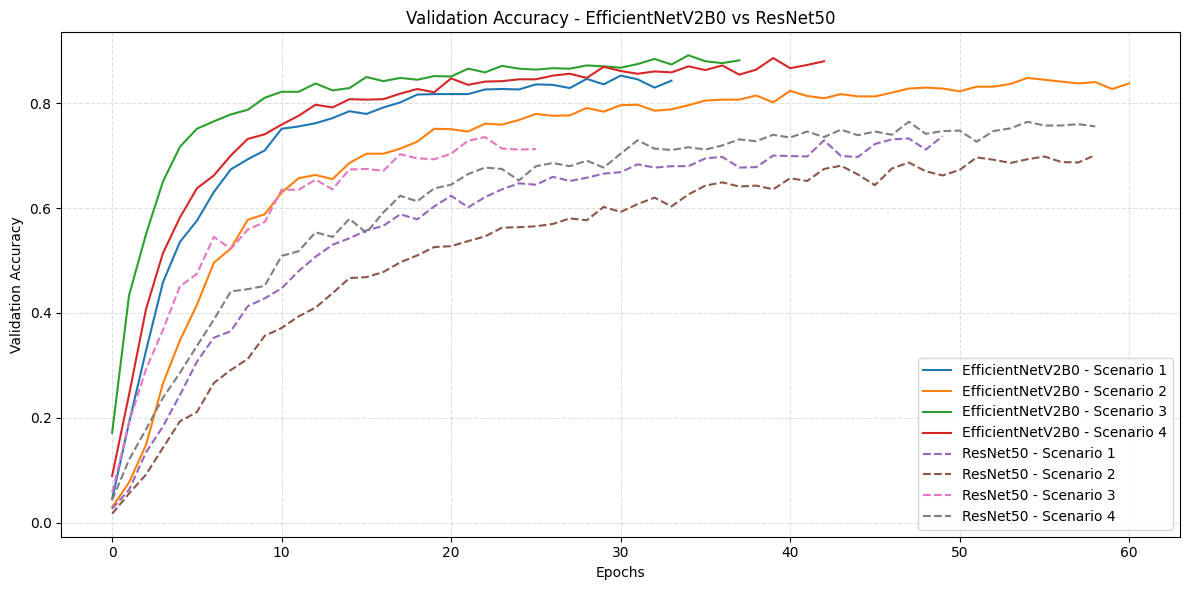

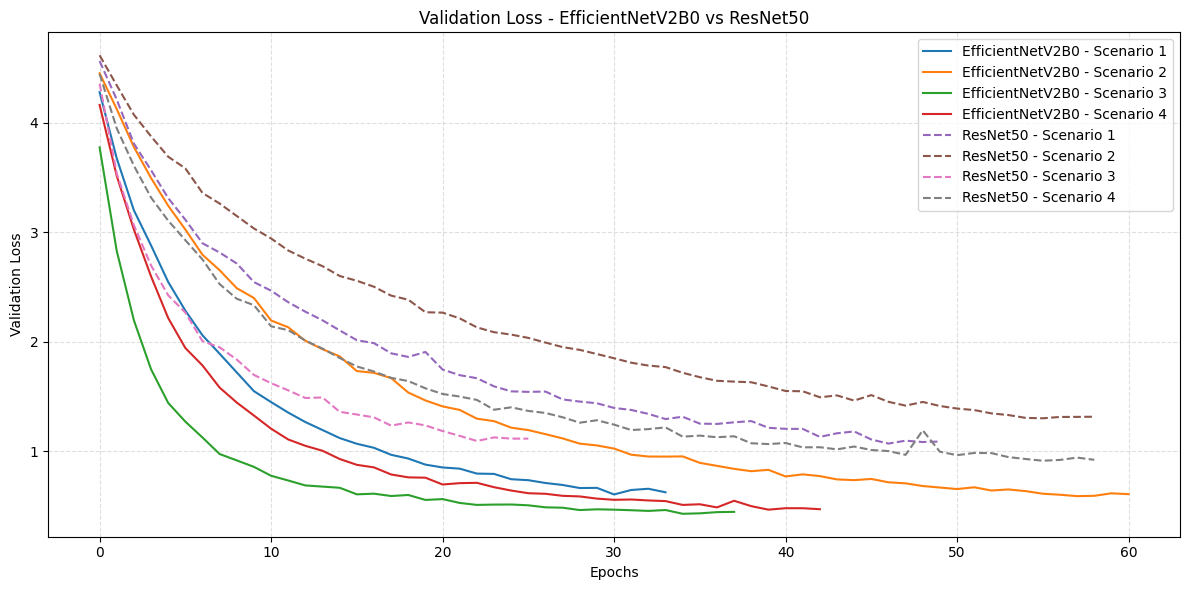

In [56]:
import matplotlib.pyplot as plt

# === Combined Validation Accuracy Plot ===
plt.figure(figsize=(12, 6))

# Plot EfficientNetV2B0 validation accuracy
for i in EfficientNetV2B0_histories:
    history = EfficientNetV2B0_histories[i]
    plt.plot(history['val_accuracy'], label=f'EfficientNetV2B0 - Scenario {i}')

# Plot ResNet50 validation accuracy
for i in ResNet50_histories:
    history = ResNet50_histories[i]
    plt.plot(history['val_accuracy'], label=f'ResNet50 - Scenario {i}', linestyle='--')

plt.title('Validation Accuracy - EfficientNetV2B0 vs ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# === Combined Validation Loss Plot ===
plt.figure(figsize=(12, 6))

# Plot EfficientNetV2B0 validation loss
for i in EfficientNetV2B0_histories:
    history = EfficientNetV2B0_histories[i]
    plt.plot(history['val_loss'], label=f'EfficientNetV2B0 - Scenario {i}')

# Plot ResNet50 validation loss
for i in ResNet50_histories:
    history = ResNet50_histories[i]
    plt.plot(history['val_loss'], label=f'ResNet50 - Scenario {i}', linestyle='--')

plt.title('Validation Loss - EfficientNetV2B0 vs ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

The validation accuracy plot provides a clear comparison between EfficientNetV2B0 and ResNet50 across their respective training scenarios. EfficientNetV2B0 consistently outperformed ResNet50 in all four configurations, achieving higher accuracy earlier in training and maintaining stronger performance throughout. Scenario 3 of EfficientNetV2B0 (256 hidden units, 0.3 dropout) reached the highest validation accuracy overall, followed closely by Scenario 4. In contrast, ResNet50 scenarios showed slower convergence and plateaued at noticeably lower accuracy levels, with more fluctuation and less stable performance across epochs. This comparison highlights the efficiency and superior generalization capability of EfficientNetV2B0 under the tested hyperparameter settings, making it the more effective architecture for this classification task.

The validation loss curves provide a clear comparison between EfficientNetV2B0 and ResNet50 across all tested scenarios. EfficientNetV2B0 consistently achieved lower validation loss than ResNet50, with Scenario 3 (256 hidden units, 0.3 dropout) showing the most efficient and stable convergence, reaching a loss below 0.5. All EfficientNetV2B0 scenarios exhibited smooth and consistent downward trends, reflecting effective learning and good generalization.

In contrast, ResNet50 scenarios displayed slower loss reduction and higher final loss values. Scenario 2 of ResNet50 performed the worst, with validation loss remaining above 1.5 throughout training, indicating difficulty in minimizing error despite extended training. The dashed lines representing ResNet50 scenarios also showed more fluctuation and less consistent convergence, suggesting instability or limited capacity to adapt under the given configurations. These results highlight EfficientNetV2B0’s superior performance in minimizing validation error and its overall robustness across different training setups.

## 8. Model Evaluation Using Unseen Test Dataset

Model evaluation using an unseen test dataset is a crucial step in assessing the true generalization performance of a trained model. Unlike training and validation sets, which influence model learning and tuning, the test set remains completely isolated throughout the development process. This allows for an unbiased estimate of how the model will perform on new, real-world data. By evaluating on this held-out dataset, key performance metrics such as accuracy, loss, and confusion matrix can be computed to determine whether the model is overfitting, underfitting, or generalizing well. This step ultimately validates the reliability and effectiveness of the model before deployment.

 EfficientNetV2B0 - Scenario 1 - Test Accuracy: 0.8398
 EfficientNetV2B0 - Scenario 2 - Test Accuracy: 0.8419
 EfficientNetV2B0 - Scenario 3 - Test Accuracy: 0.8994
 EfficientNetV2B0 - Scenario 4 - Test Accuracy: 0.8768
 ResNet50 - Scenario 1 - Test Accuracy: 0.7207
 ResNet50 - Scenario 2 - Test Accuracy: 0.7002
 ResNet50 - Scenario 3 - Test Accuracy: 0.7187
 ResNet50 - Scenario 4 - Test Accuracy: 0.7700


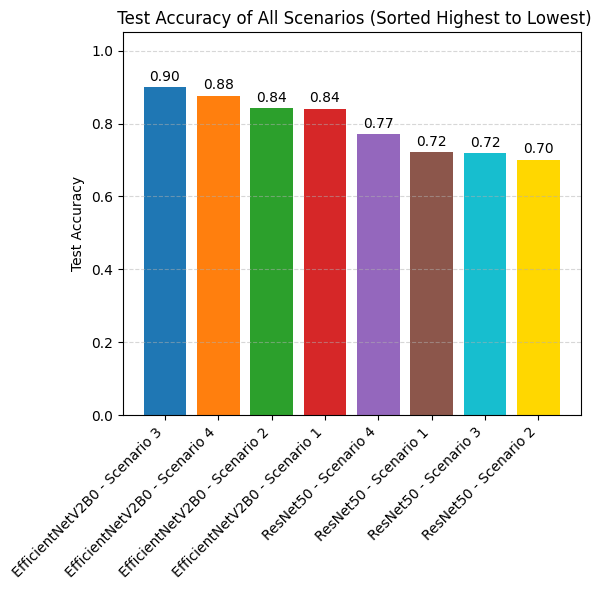

In [64]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# === Configuration ===
model_scenarios = []

# Add EfficientNetV2B0 scenarios
for i in EfficientNetV2B0_histories:
    model_path = f"EfficientNetV2B0_scenario_{i}.keras"
    model_name = "EfficientNetV2B0"
    model_scenarios.append({
        'id': i,
        'model_name': model_name,
        'path': model_path
    })

# Add ResNet50 scenarios
for i in ResNet50_histories:
    model_path = f"Res50_scenario_{i}.keras"
    model_name = "ResNet50"
    model_scenarios.append({
        'id': i,
        'model_name': model_name,
        'path': model_path
    })

# === Step 1: Evaluate each model on test dataset ===
test_accuracies = []

for scenario in model_scenarios:
    try:
        model = load_model(scenario['path'])
        loss, accuracy = model.evaluate(test_dataset, verbose=0)

        # Create a label for the chart and print
        label = f"{scenario['model_name']} - Scenario {scenario['id']}"
        test_accuracies.append({
            'label': label,
            'accuracy': accuracy
        })
        print(f" {label} - Test Accuracy: {accuracy:.4f}")

    except Exception as e:
        print(f" Failed to evaluate {scenario['path']}: {e}")

# === Step 2: Sort by accuracy descending ===
test_accuracies_sorted = sorted(test_accuracies, key=lambda x: x['accuracy'], reverse=True)

# === Step 3: Plot sorted bar chart ===
labels = [item['label'] for item in test_accuracies_sorted]
accuracies = [item['accuracy'] for item in test_accuracies_sorted]
x = np.arange(len(labels))


colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#17becf',  # Teal
    '#ffd700'   # Gold
]


plt.figure(figsize=(6, 6))
bars = plt.bar(x, accuracies, color=colors)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.01, f"{height:.2f}", ha='center', va='bottom')

plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("Test Accuracy")
plt.title(" Test Accuracy of All Scenarios (Sorted Highest to Lowest)")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The test accuracy comparison across all scenarios reveals that EfficientNetV2B0 consistently outperformed ResNet50 on the unseen test dataset. Scenario 3 of EfficientNetV2B0 achieved the highest test accuracy at 90%, followed by Scenarios 4, 2, and 1, all maintaining strong performance above 84%. In contrast, ResNet50 scenarios showed noticeably lower test accuracy, ranging from 70% to 77%, with Scenario 4 performing the best among them. These results confirm the superior generalization ability of EfficientNetV2B0 under the tested configurations, validating its robustness and efficiency when applied to new, unseen data. The clear margin between the two models reinforces the advantage of using more modern, optimized architectures like EfficientNet for image classification tasks.

Loading model...
Model loaded.
Running predictions using generator...
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 461ms/step
Prediction completed in 9.62 seconds.
Generating confusion matrix...


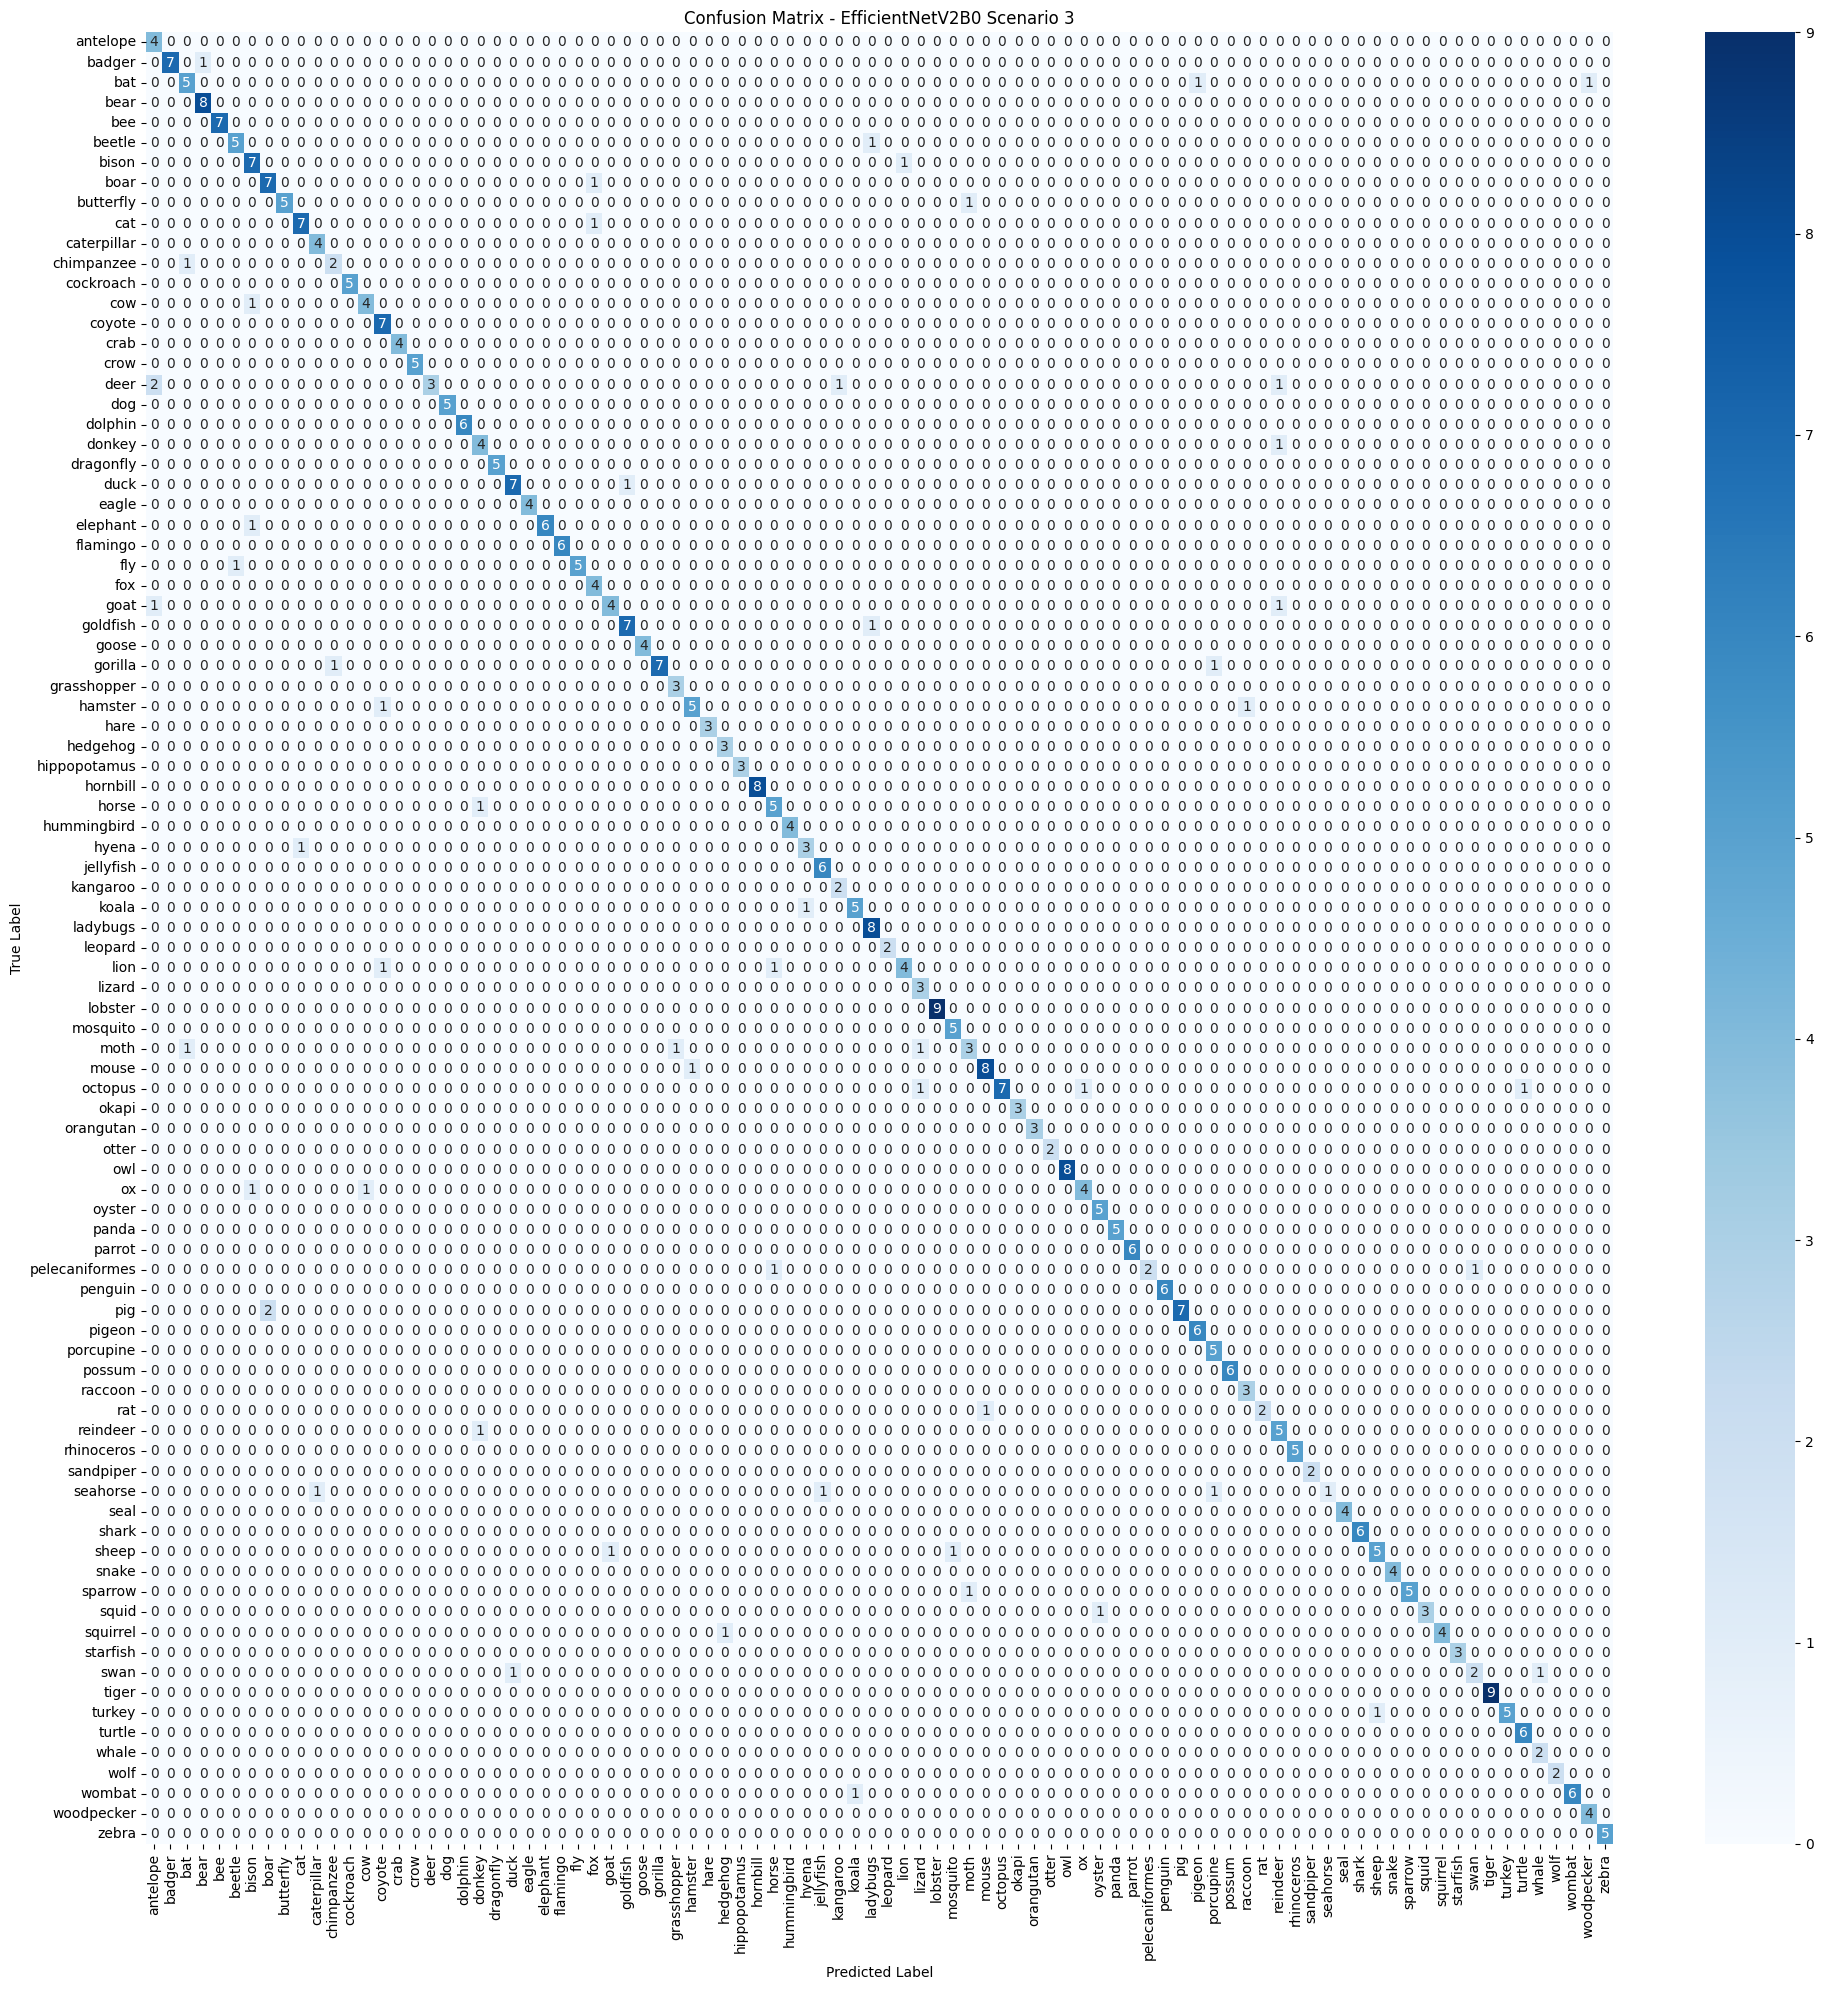

Total predictions: 487
Correct predictions: 430
Incorrect predictions: 57
Accuracy: 88.30%


In [83]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# === Load model
model_path = "EfficientNetV2B0_scenario_3.keras"
print("Loading model...")
model = load_model(model_path)
print("Model loaded.")

# === Get class names and true labels
class_names = list(test_dataset.class_indices.keys())
true_labels = test_dataset.classes  # ground-truth integer labels

# === Predict (batched, efficient)
print("Running predictions using generator...")
start_time = time.time()
pred_probs = model.predict(test_dataset, verbose=1)
pred_labels = np.argmax(pred_probs, axis=1)
end_time = time.time()
print(f"Prediction completed in {end_time - start_time:.2f} seconds.")

# === Confusion Matrix
print("Generating confusion matrix...")
cm = confusion_matrix(true_labels, pred_labels)

# === Plot
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - EfficientNetV2B0 Scenario 3")
plt.tight_layout()
plt.show()

# === Count true vs false predictions
correct_predictions = np.sum(pred_labels == true_labels)
incorrect_predictions = np.sum(pred_labels != true_labels)
total_predictions = len(true_labels)

print(f"Total predictions: {total_predictions}")
print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")
print(f"Accuracy: {correct_predictions / total_predictions:.2%}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


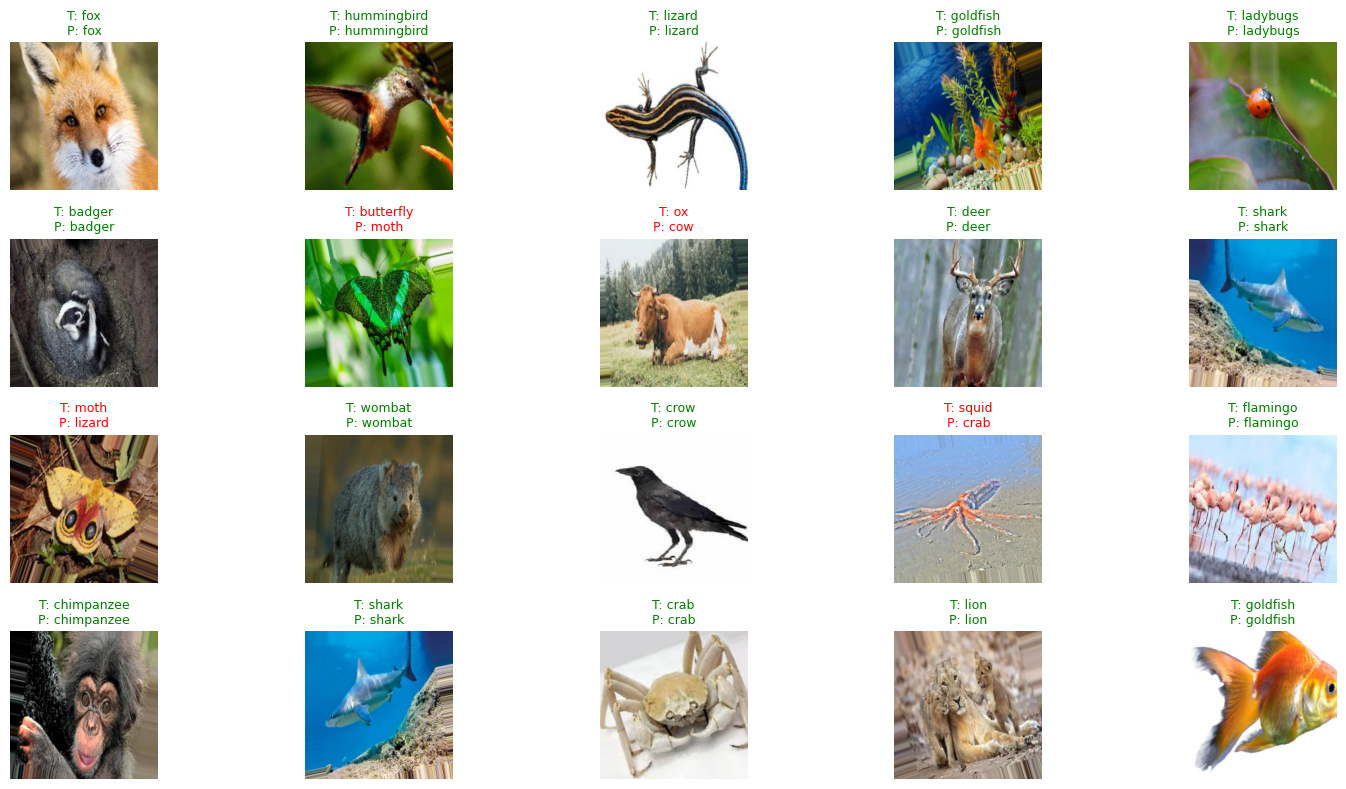

In [68]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# === Load EfficientNetV2B0 Scenario 3 ===
model_path = "EfficientNetV2B0_scenario_3.keras"
model = load_model(model_path)

# Get class names from DataFrameIterator
class_names = list(test_dataset.class_indices.keys())

# Collect all test samples and labels into memory
images = []
true_labels = []

for batch in test_dataset:
    imgs, labels = batch
    images.extend(imgs)
    true_labels.extend(np.argmax(labels, axis=1))
    if len(images) >= 1000:
        break

images = np.array(images)
true_labels = np.array(true_labels)

# Randomly select 20 samples
indices = random.sample(range(len(images)), 20)
sample_images = images[indices]
sample_true = true_labels[indices]

# Predict
pred_probs = model.predict(sample_images)
pred_labels = np.argmax(pred_probs, axis=1)

# Plot
plt.figure(figsize=(16, 8))  # smaller figure size than before (was 20,10)

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(sample_images[i].astype("uint8"))
    plt.axis('off')
    true_class = class_names[sample_true[i]]
    pred_class = class_names[pred_labels[i]]
    color = 'green' if true_class == pred_class else 'red'
    plt.title(f"T: {true_class}\nP: {pred_class}", color=color, fontsize=9)

# Reduce spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plt.tight_layout()
plt.show()

The image displays a selection of 20 test samples showing true vs. predicted labels generated by the best-performing EfficientNetV2B0 model (Scenario 3). Each image is annotated with the true label (T:) and predicted label (P:), with correct predictions shown in green and incorrect ones in red. The majority of predictions are accurate, reflecting the model's strong generalization on unseen data. However, a few misclassifications—such as "moth" predicted as "lizard" and "ox" predicted as "cow"—highlight occasional confusion between visually similar classes. Overall, the results demonstrate that the model performs well across a diverse range of animal categories, with only a small number of errors.

## 9. Conclusion, Discussion and Future Work

- ### Conclusion

In this project, I developed and evaluated image classification models using two well-known convolutional neural network architectures: EfficientNetV2B0 and ResNet50. I began by analyzing the dataset, checking for issues such as class imbalance, inconsistent image dimensions, duplicate images, and outliers. After confirming the dataset’s quality, I set up a training pipeline using transfer learning and data augmentation, and split the data into training, validation, and test sets. I tested both models under four different hyperparameter scenarios, varying the number of hidden units and dropout rates. Throughout training, I monitored accuracy and loss, stored training histories, and visualized key metrics. The results showed that EfficientNetV2B0 significantly outperformed ResNet50 in both validation and test accuracy, with Scenario 3 (256 hidden units, 0.3 dropout) achieving the best overall performance.



- ### Discussion

Based on the experiments, I found that EfficientNetV2B0 not only trained more efficiently but also achieved better generalization than ResNet50 across all tested scenarios. It consistently reached higher validation and test accuracy while maintaining lower loss, indicating better learning and robustness. Visual inspection of predictions confirmed this, with only a few errors, most of which were understandable confusions between similar-looking classes. The experiments also highlighted how different combinations of dropout and hidden units impact performance, showing that careful tuning can lead to meaningful improvements.



- ### Future Work

For future improvements, several directions can be explored:

- Fine-tuning the base model layers instead of freezing them could lead to further accuracy gains, especially on a larger dataset.

- Exploring other modern architectures, such as EfficientNetV2B1/B2 or ConvNeXt, could yield additional performance benefits.

- Class-specific performance analysis could help identify which categories are most challenging and guide targeted data augmentation or class rebalancing.

- Model ensembling (combining predictions from multiple well-performing models) might further enhance overall accuracy.

- Additionally, deploying the trained model into a real-time inference system or an application would be a practical next step to demonstrate its usefulness beyond offline evaluation.

Overall, the project successfully built a robust classification pipeline and demonstrated the superiority of EfficientNetV2B0 for this task.